# <div style="text-align:center">Workflow de Classifica√ß√£o: Diagn√≥stico de C√¢ncer de Mama</div>

## **Projeto:** ADA - Projeto Machine Learning

### **Objetivo:** Desenvolver um modelo de classifica√ß√£o para prever se um diagn√≥stico √© Maligno ou Benigno.

<b>Grupo 5: Valdir, Luciana, Wagner, Fernando e Lincoln<b>

## Etapa 1: Explica√ß√£o do Problema e Sele√ß√£o da Base de Dados

### Usamos como dados o Breast Cancer Wisconsin (Diagnostic) que est√° dispon√≠vel no Kaggle atrav√©s do link https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


### Caracter√≠sticas de Tumores Benignos vs. Malignos

### üß¨ Caracter√≠sticas das C√©lulas Individuais

| Tipo de Tumor | Tamanho e Forma (Raio, √Årea, Per√≠metro) | N√∫cleo da C√©lula (DNA) |
|---------------|------------------------------------------|-------------------------|
| **Benigno**   | Uniformes, organizadas, previs√≠veis      | Pequeno, regular, proporcional √† c√©lula |
| **Maligno**   | Diferentes em tamanhos e formas, sem padr√£o (pleomorfismo) | Muito grande, desproporcional, irregular, cor escura |



### üß± Caracter√≠sticas da Estrutura do Tumor

| Tipo de Tumor | Bordas e Contorno (Concavidade, Compacidade) | Textura e Suavidade (Texture, Smoothness) | Simetria |
|---------------|-----------------------------------------------|--------------------------------------------|----------|
| **Benigno**   | Bordas bem definidas, lisas, regulares, contido em uma c√°psula | Textura homog√™nea, suave, uniforme         | Mais sim√©trico, formato regular (redondo/oval) |
| **Maligno**   | Bordas irregulares, mal definidas, com pontas (espiculadas), infiltrativo | Textura heterog√™nea, √°spera, granulada     | Assim√©trico, formato irregular |



### ‚öôÔ∏è Comportamento Geral do Tumor

| Tipo de Tumor | Crescimento e Invas√£o | Capacidade de Met√°stase |
|---------------|------------------------|--------------------------|
| **Benigno**   | Crescimento lento, expansivo (empurra os tecidos), n√£o invasivo | N√£o se espalha para outras partes do corpo (sem met√°stase) |
| **Maligno**   | Crescimento r√°pido, infiltrativo (invade e destr√≥i tecidos) | Pode se espalhar para outros √≥rg√£os (d√° met√°stase) |


<div style="display: flex; justify-content:center">
    <img src="tipoTumor1.jpg" width="400" height="400">
    <img src="tipoTumor2.jpg" width="400" height="400" style="margin-left:20px">
</div>


#### Nosso objetivo √© que modelo nos traga resultados com a melhor precis√£o poss√≠vel e que, de prefer√™ncia, n√£o apresente nenhum <i>Falso Ben√≠gno</i>, ou seja, que ele n√£o retorne como <i>Ben√≠gno</i> um diagn√≥stico que seja <i>Mal√≠gno</i>.

#### Este projeto √© um Aprendizado Supervisionado e vamos resolver um Problema de Classifica√ß√£o

### Importa√ß√£o dos Dados:

In [ ]:
%pip install --quiet pandas numpy matplotlib seaborn scikit-learn
%pip install --quiet xgboost
%pip install --quiet kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings

# Suprime apenas FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "data.csv"

dt = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/breast-cancer-wisconsin-data",
  file_path
)

print("Primeiros 5 registros:" )
dt.head()

Primeiros 5 registros:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
print("=== Informa√ß√µes do DataFrame ===")
dt.info()

### üìä Informa√ß√µes do DataFrame

| #   | Coluna                   | Non-Null Count | Tipo     |
|-----|--------------------------|----------------|----------|
| 0   | id                       | 569            | int64    |
| 1   | diagnosis                | 569            | object   |
| 2   | radius_mean              | 569            | float64  |
| 3   | texture_mean             | 569            | float64  |
| 4   | perimeter_mean           | 569            | float64  |
| 5   | area_mean                | 569            | float64  |
| 6   | smoothness_mean          | 569            | float64  |
| 7   | compactness_mean         | 569            | float64  |
| 8   | concavity_mean           | 569            | float64  |
| 9   | concave points_mean      | 569            | float64  |
| 10  | symmetry_mean            | 569            | float64  |
| 11  | fractal_dimension_mean   | 569            | float64  |
| 12  | radius_se                | 569            | float64  |
| 13  | texture_se               | 569            | float64  |
| 14  | perimeter_se             | 569            | float64  |
| 15  | area_se                  | 569            | float64  |
| 16  | smoothness_se            | 569            | float64  |
| 17  | compactness_se           | 569            | float64  |
| 18  | concavity_se             | 569            | float64  |
| 19  | concave points_se        | 569            | float64  |
| 20  | symmetry_se              | 569            | float64  |
| 21  | fractal_dimension_se     | 569            | float64  |
| 22  | radius_worst             | 569            | float64  |
| 23  | texture_worst            | 569            | float64  |
| 24  | perimeter_worst          | 569            | float64  |
| 25  | area_worst               | 569            | float64  |
| 26  | smoothness_worst         | 569            | float64  |
| 27  | compactness_worst        | 569            | float64  |
| 28  | concavity_worst          | 569            | float64  |
| 29  | concave points_worst     | 569            | float64  |
| 30  | symmetry_worst           | 569            | float64  |
| 31  | fractal_dimension_worst  | 569            | float64  |
| 32  | Unnamed                  |   0            | object   |

In [28]:

print("\n=== Estat√≠sticas Descritivas Transpostas ===")
dt.describe().T



=== Estat√≠sticas Descritivas Transpostas ===


count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

Verificando valores ausentes com um mapa de calor


<Axes: >

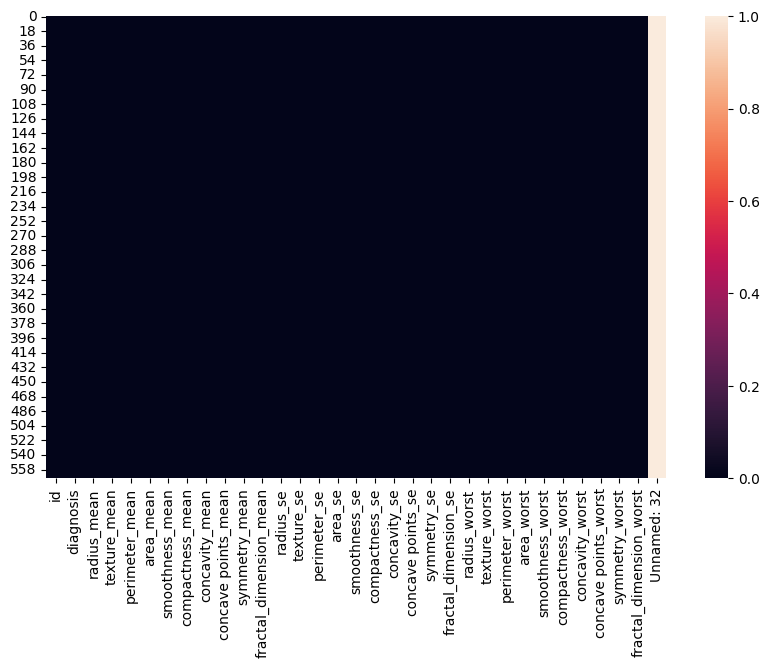

In [29]:
print("Verificando valores ausentes com um mapa de calor")
plt.figure(figsize=(10, 6))
sns.heatmap(dt.isnull())

## Etapa 2: An√°lise Explorat√≥ria de Dados (EDA)

**Revis√£o Preliminar do Conjunto de Dados**

O *dataset*, com 569 registros e 33 colunas, √© adequado para an√°lise explorat√≥ria e modelagem preditiva, desde que pr√©-processado.

**Estrutura e Qualidade dos Dados:**

* **Dimens√£o:** 569 registros e 33 colunas.
* **Dados Faltantes:** A coluna `Unnamed: 32` est√° integralmente vazia e deve ser removida. As demais 32 colunas n√£o cont√™m valores nulos.
* **Colunas Irrelevantes:** A coluna `id`, um identificador √∫nico sem valor preditivo, deve ser exclu√≠da.
* **Tipos de Dados:** A vari√°vel alvo (`diagnosis`, tipo `object`) exige convers√£o para formato num√©rico (bin√°rio) para uso em algoritmos. Os demais atributos preditores (`float64` ou `int64`) est√£o em formato apropriado.
* **Escala das Vari√°veis:** A disparidade de escala entre os atributos num√©ricos (ex.: `area_mean` *vs.* `smoothness_mean`) pode impactar o desempenho do modelo. Padroniza√ß√£o ou normaliza√ß√£o √© obrigat√≥ria.

**Conclus√£o:** O conjunto de dados apresenta boa estrutura e aus√™ncia de nulos (exceto uma coluna a ser removida). Ajustes cruciais incluem a exclus√£o de colunas irrelevantes (`Unnamed: 32` e `id`), a transforma√ß√£o da vari√°vel alvo para formato num√©rico e a aplica√ß√£o de t√©cnicas de escala nos atributos preditores. Tais procedimentos s√£o essenciais para otimizar a efic√°cia dos modelos de *machine learning*.

### Limpeza preliminar (remover colunas `id` e `Unnamed: 32`)

In [ ]:
dt = dt.drop(columns=['Unnamed: 32', 'id'])
dt.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### Analisar a distribui√ß√£o da vari√°vel alvo `diagnosis`

In [31]:
counts = dt['diagnosis'].value_counts()
percentages = dt['diagnosis'].value_counts(normalize=True)*100

distribution_df = pd.DataFrame({
    'Contagem': counts,
    'Porcentagem': percentages.map('{:.2f}%'.format) # Formata a coluna de porcentagem
})
print("Distribui√ß√£o das Classes:")
print(distribution_df)

Distribui√ß√£o das Classes:
           Contagem Porcentagem
diagnosis                      
B               357      62.74%
M               212      37.26%


 **An√°lise Visual**
 Um gr√°fico de contagem (countplot) √© a melhor forma de visualizar a distribui√ß√£o.

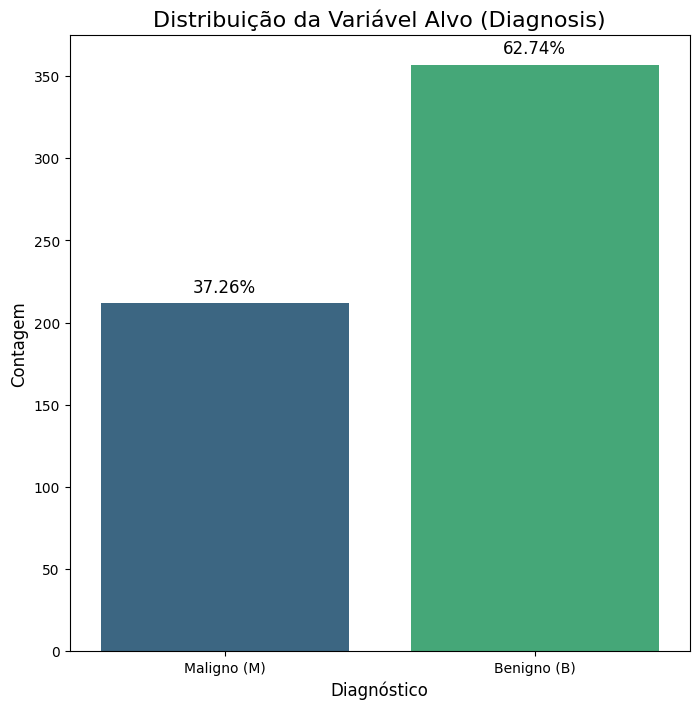

In [32]:

plt.figure(figsize=(8, 8))

total = len(dt)
ax = sns.countplot(x='diagnosis', data=dt, palette='viridis', hue='diagnosis')
for p in ax.patches:
    count = p.get_height()
    # Calcula a porcentagem
    percentage = f'{100 * count / total:.2f}%'
    x = p.get_x() + p.get_width() / 2  # Centro da barra
    y = p.get_height()                 # Topo da barra

    # Adiciona o texto usando ax.annotate para mais controle
    ax.annotate(
        text=percentage,
        xy=(x, y),
        xytext=(0, 5), # Deslocamento vertical de 5 pontos
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Adicionando t√≠tulos e r√≥tulos para clareza (seu c√≥digo original)
plt.title('Distribui√ß√£o da Vari√°vel Alvo (Diagnosis)', fontsize=16)
plt.xlabel('Diagn√≥stico', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Maligno (M)', 'Benigno (B)'])

plt.show()

**An√°lise do Desbalanceamento de Classes**

O conjunto de dados apresenta desbalanceamento na vari√°vel alvo `diagnosis`: 357 casos benignos (B, 62,74%) *versus* 212 casos malignos (M, 37,26%). Tal desequil√≠brio exige considera√ß√µes espec√≠ficas na modelagem.

**Implica√ß√µes Metodol√≥gicas:**

* **M√©tricas de Avalia√ß√£o:** A acur√°cia √© inadequada como m√©trica principal, pois um modelo pode atingir 62,74% de acur√°cia classificando todos os casos como benignos, falhando na detec√ß√£o de malignos (Falsos Negativos). √â mandat√≥rio utilizar m√©tricas robustas, como *Recall*, *Precision*, *F1-Score* e Matriz de Confus√£o. O *Recall* da classe Maligna ("M") √© particularmente crucial, visando minimizar os Falsos Negativos.
* **Divis√£o dos Dados:** A separa√ß√£o dos dados em conjuntos de treino e teste deve ser realizada com **estratifica√ß√£o** (ex.: usando o par√¢metro `stratify` na fun√ß√£o `train_test_split`). Isso assegura que a propor√ß√£o original das classes seja mantida em ambos os subconjuntos, garantindo a representatividade e a confiabilidade da avalia√ß√£o.

**Conclus√£o:** O desequil√≠brio entre as classes benignas e malignas imp√µe a escolha de m√©tricas sens√≠veis (como *Recall* e *F1-Score*) em detrimento da acur√°cia e a aplica√ß√£o da estratifica√ß√£o na divis√£o dos dados. Tais procedimentos s√£o essenciais para um desempenho de modelo confi√°vel e clinicamente √∫til, especialmente na detec√ß√£o de casos malignos.

###  Analisar a distribui√ß√£o das features num√©ricas com histogramas

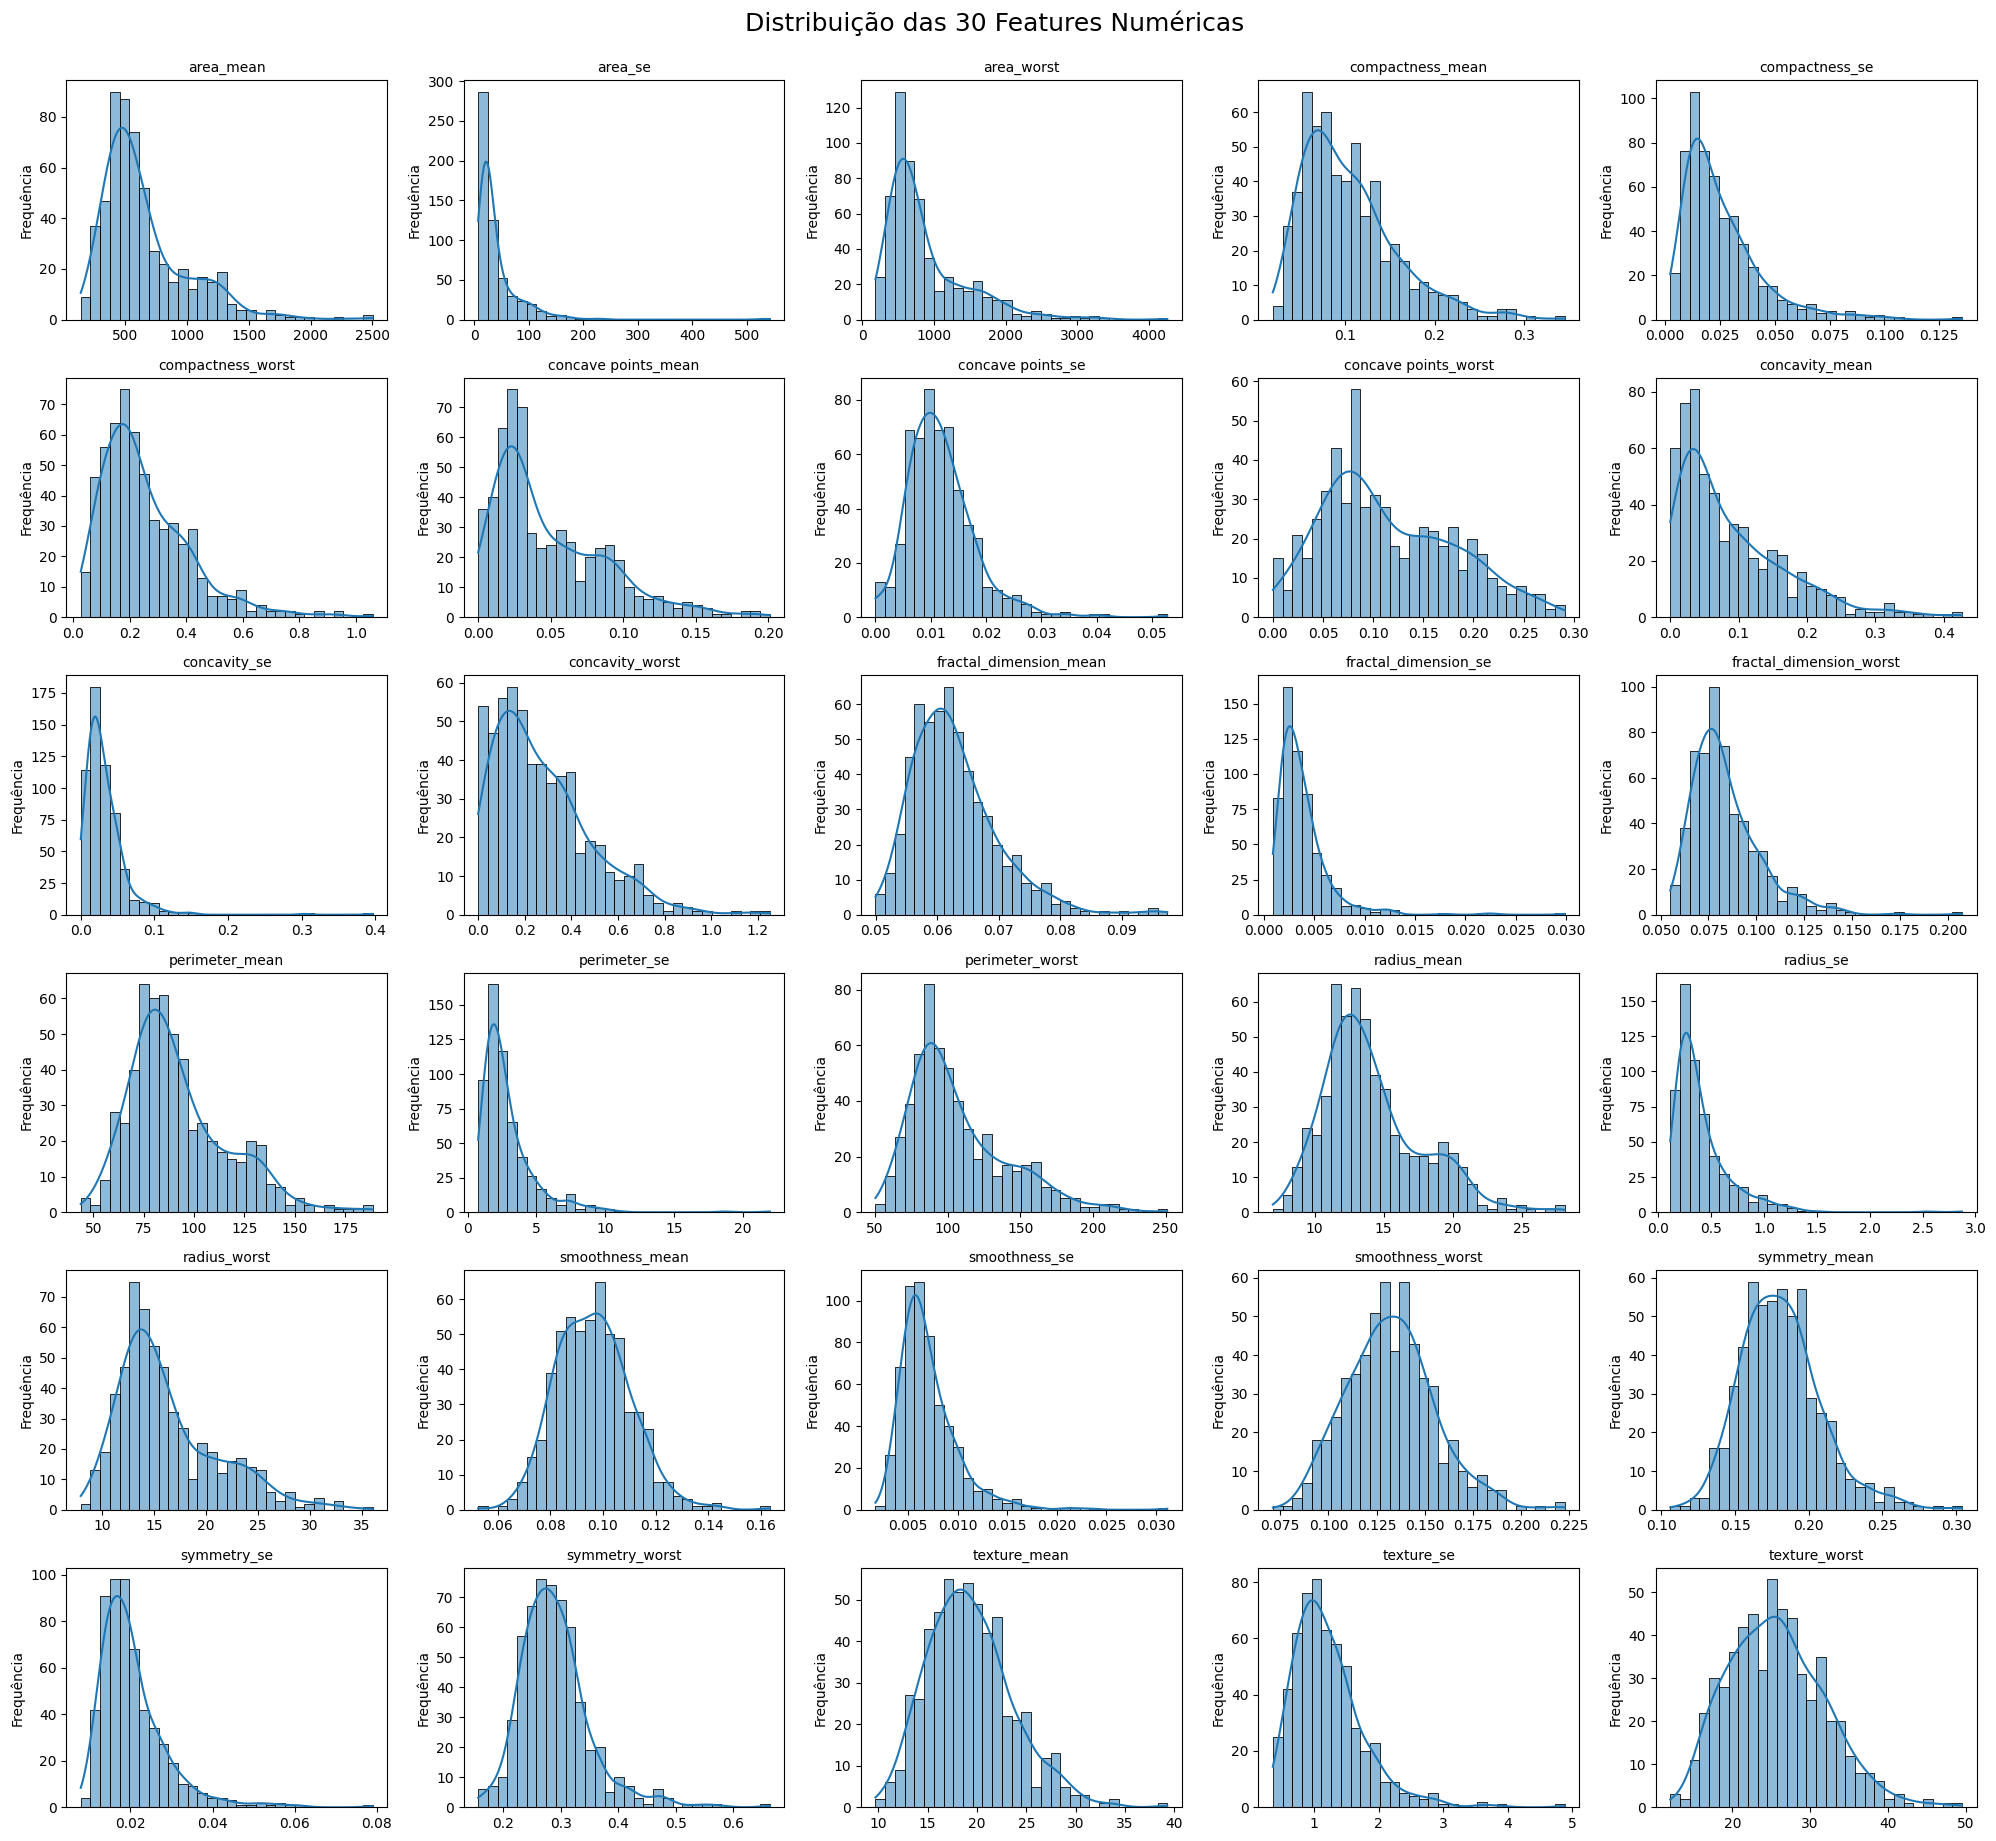

In [33]:
# Tarefa 2.2: Gerar histogramas para todas as 30 features num√©ricas
# Coment√°rios em portugu√™s brasileiro

# Seleciona apenas as colunas num√©ricas
features_numericas = sorted(dt.select_dtypes(include=[np.number]).columns)

# Cria histogramas para cada feature num√©rica usando programa√ß√£o funcional
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 18))
axes = axes.flatten()
#sns.set_style('whitegrid')

for idx, feature in enumerate(features_numericas):
    # Plota o histograma de cada feature
    sns.histplot(dt[feature], bins=30, ax=axes[idx], kde=True)
    axes[idx].set_title(f"{feature}", fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequ√™ncia')

# Remove eixos n√£o utilizados
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle('Distribui√ß√£o das 30 Features Num√©ricas', fontsize=18, y=1.02)
plt.show()

**An√°lise da Distribui√ß√£o das Vari√°veis Num√©ricas (Features)**

A an√°lise dos histogramas das 30 *features* num√©ricas revela padr√µes de distribui√ß√£o cruciais para o pr√©-processamento e a modelagem.

**Padr√µes de Distribui√ß√£o e Implica√ß√µes:**

* **Assimetria Positiva (√Ä Direita):** A maioria das *features* ($\text{e.g., radius\_mean, area\_mean, concavity\_mean}$) exibe forte assimetria positiva. Este padr√£o sugere que uma minoria de registros possui valores extremos (*outliers*), que podem estar associados a casos malignos. A alta magnitude desses *outliers* torna a **padroniza√ß√£o de dados** uma etapa obrigat√≥ria para otimizar o treinamento do modelo.
* **Distribui√ß√µes Sim√©tricas (Aproximadamente Normais):** Vari√°veis como $\text{texture\_mean}$ e $\text{symmetry\_mean}$ apresentam distribui√ß√µes mais sim√©tricas, podendo fornecer informa√ß√µes preditivas complementares √†s *features* mais assim√©tricas.

**Interpreta√ß√£o Estrutural dos Sufixos:**

* **Sufixo `_worst`:** As *features* com este sufixo (maiores valores) apresentam as distribui√ß√µes mais amplas e assim√©tricas, indicando seu alto potencial de **discrimina√ß√£o** entre classes benignas e malignas.
* **Sufixo `_se`:** As *features* que representam o erro padr√£o (`_se`) exibem, em geral, **baixa variabilidade** e forte assimetria. Sua menor amplitude de valores exige um pr√©-processamento cuidadoso para garantir que sua contribui√ß√£o preditiva n√£o seja negligenciada ap√≥s a normaliza√ß√£o.

**Conclus√£o:** A heterogeneidade das distribui√ß√µes e escalas das *features* valida a necessidade **indispens√°vel** da padroniza√ß√£o. A an√°lise da assimetria e dos sufixos (sendo `_worst` um indicador de alta relev√¢ncia preditiva) estabelece as hip√≥teses iniciais sobre a import√¢ncia das vari√°veis, direcionando as estrat√©gias subsequentes de modelagem.


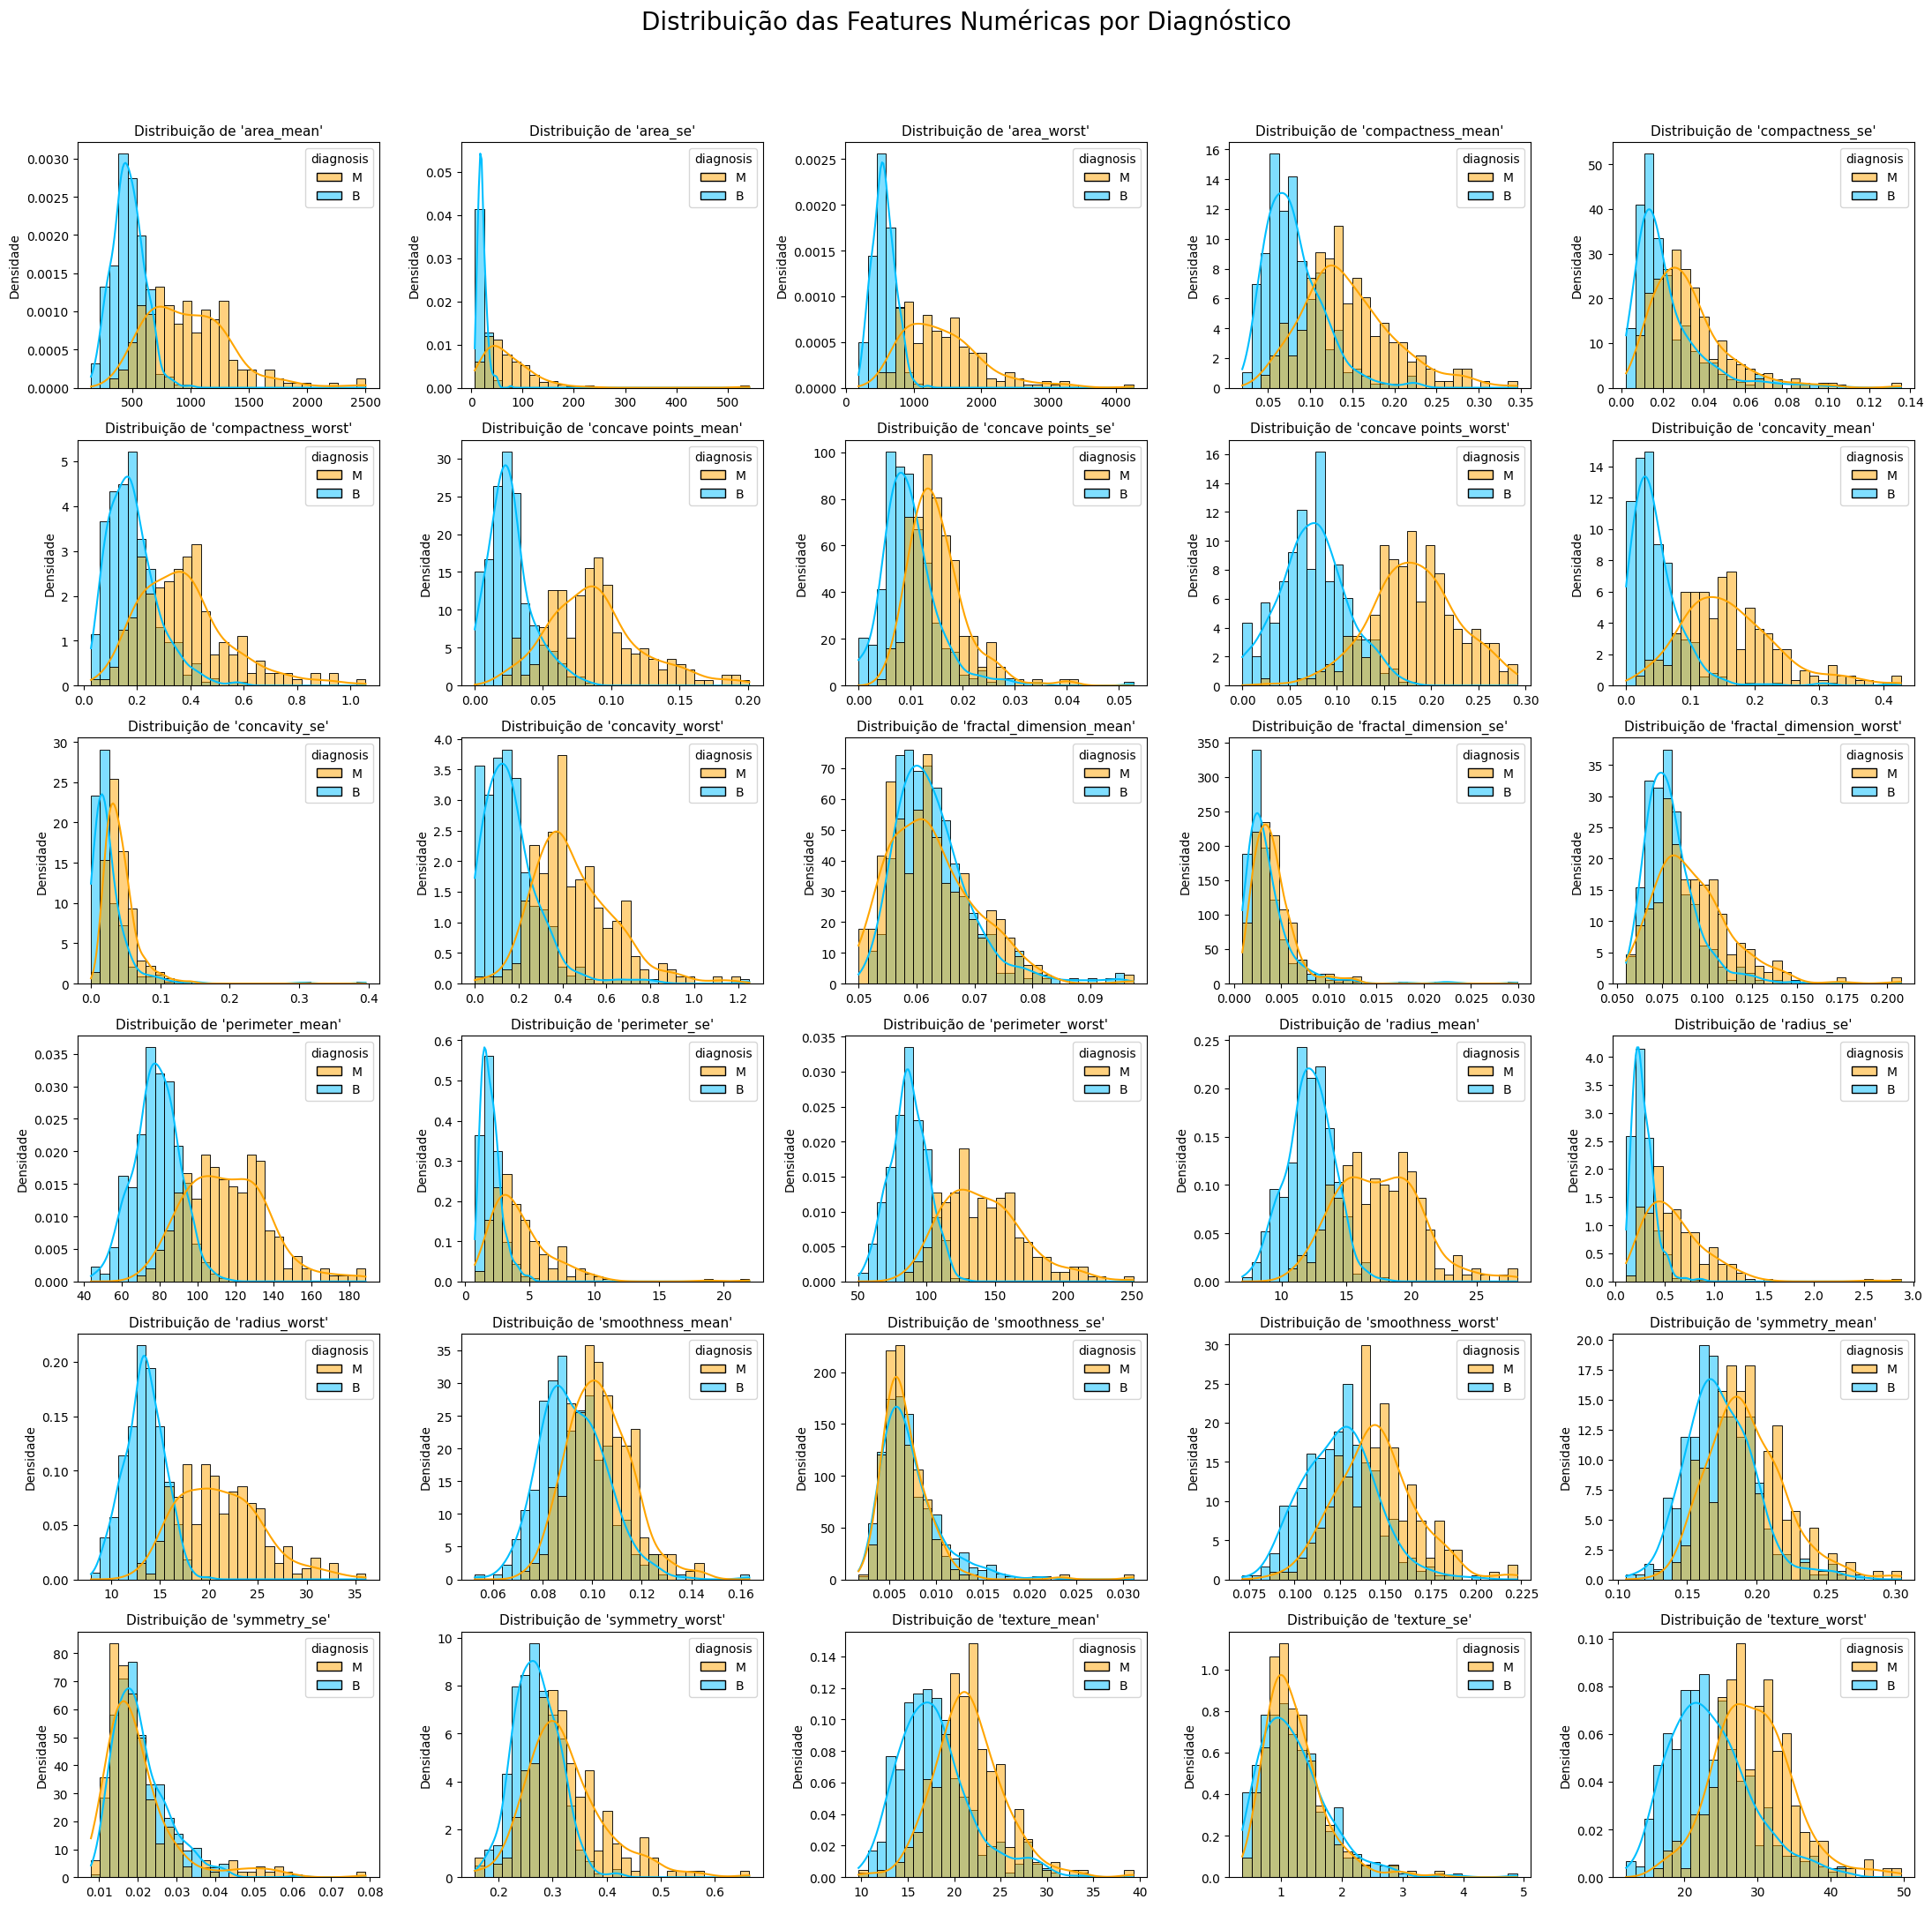

In [34]:

# Seleciona apenas as colunas num√©ricas. A coluna 'diagnosis' (object) ser√° ignorada.
features_numericas = sorted(dt.select_dtypes(include=[np.number]).columns)

# Cria a figura e os eixos para os subplots
# Ajusta para 7 linhas x 5 colunas para acomodar todas as 31 features
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(22, 24))
axes = axes.flatten() # Transforma a matriz de eixos em um array 1D

# Itera sobre cada feature num√©rica para criar seu respectivo histograma
for idx, feature in enumerate(features_numericas):
    sns.histplot(
        data=dt,
        x=feature,
        hue='diagnosis',         # SEPARA E COLORE os dados pela coluna 'diagnosis'
        bins=30,
        ax=axes[idx],
        kde=True,
        stat='density',
        common_norm=False,
        palette={'B': 'deepskyblue', 'M': 'orange'} # Mapeia os valores 'B' e 'M' para cores
    )
    axes[idx].set_title(f"Distribui√ß√£o de '{feature}'", fontsize=11)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Densidade')

# Remove os eixos que n√£o foram utilizados
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

# Adiciona um t√≠tulo geral e ajusta o layout
plt.suptitle('Distribui√ß√£o das Features Num√©ricas por Diagn√≥stico', fontsize=20, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### An√°lise da Distribui√ß√£o de Features por Diagn√≥stico

A an√°lise das distribui√ß√µes das vari√°veis por classe (tumores benignos ‚Äî B, e malignos ‚Äî M) constitui o eixo central da explora√ß√£o dos dados. As caracter√≠sticas morfol√≥gicas dos n√∫cleos celulares exibem um **sinal estat√≠stico forte e consistente**, capaz de distinguir com clareza os dois tipos de tumor. As vari√°veis foram agrupadas conforme seu poder discriminativo.

---

#### 1. Preditores de Alto Desempenho (Excelente Separa√ß√£o)

As classes B e M apresentam distribui√ß√µes claramente distintas, com m√≠nima sobreposi√ß√£o e valores significativamente mais altos para os tumores malignos.

* **Principais features:**
  `concave points_mean`, `concave points_worst`, `perimeter_worst`, `radius_worst`, `area_worst`, `concavity_mean`, `area_mean`, `radius_mean`, `perimeter_mean`.

* **Interpreta√ß√£o cl√≠nica:**
  Relacionam-se ao **tamanho** (`radius`, `perimeter`, `area`) e √† **irregularidade dos contornos** (`concavity`, `concave points`). Confirmam que tumores malignos tendem a ser maiores e com bordas mais irregulares.

* **Implica√ß√µes para modelagem:**
  S√£o os **preditivos mais relevantes**. Modelos como √°rvores de decis√£o tendem a utiliz√°-los como crit√©rios iniciais de divis√£o.

---

#### 2. Preditores de Desempenho Moderado (Separa√ß√£o Razo√°vel)

Apresentam sobreposi√ß√£o mais acentuada, embora ainda revelem diferen√ßas entre m√©dias e picos das classes.

* **Principais features:**
  `texture_mean`, `texture_worst`, `smoothness_worst`, `compactness_worst`, `symmetry_worst`.

* **Interpreta√ß√£o cl√≠nica:**
  Indicadores de **textura** e **compacidade** complementam os principais, auxiliando na distin√ß√£o de casos menos evidentes.

* **Implica√ß√µes para modelagem:**
  Contribuem para o **refinamento do modelo**, especialmente em situa√ß√µes amb√≠guas.

---

#### 3. Preditores de Baixo Desempenho (Alta Sobreposi√ß√£o)

As distribui√ß√µes das classes s√£o semelhantes, limitando o poder discriminativo individual.

* **Principais features:**
  `fractal_dimension_se`, `smoothness_se`, `symmetry_se`, `fractal_dimension_mean`.

* **Interpreta√ß√£o cl√≠nica:**
  Vari√°veis como o erro padr√£o da suavidade ou simetria **n√£o diferenciam** de forma consistente os diagn√≥sticos.

* **Implica√ß√µes para modelagem:**
  T√™m **baixo poder preditivo** e podem ser descartadas, embora a regulariza√ß√£o possa ajustar sua relev√¢ncia.

---

#### S√≠ntese Final

* **Valida√ß√£o da hip√≥tese:**
  As distribui√ß√µes bimodais refletem a sobreposi√ß√£o entre diagn√≥sticos benignos e malignos.
* **Multicolinearidade:**
  Vari√°veis como `radius`, `perimeter` e `area` s√£o fortemente correlacionadas; o uso do `StandardScaler` √© essencial em algoritmos sens√≠veis √† escala.
* **Confian√ßa no problema:**
  A clara separabilidade de diversas vari√°veis confirma a **robustez do sinal** e sustenta a constru√ß√£o de **modelos de alta performance** e confiabilidade.




### Analisar a rela√ß√£o entre as features e a vari√°vel alvo com boxplots

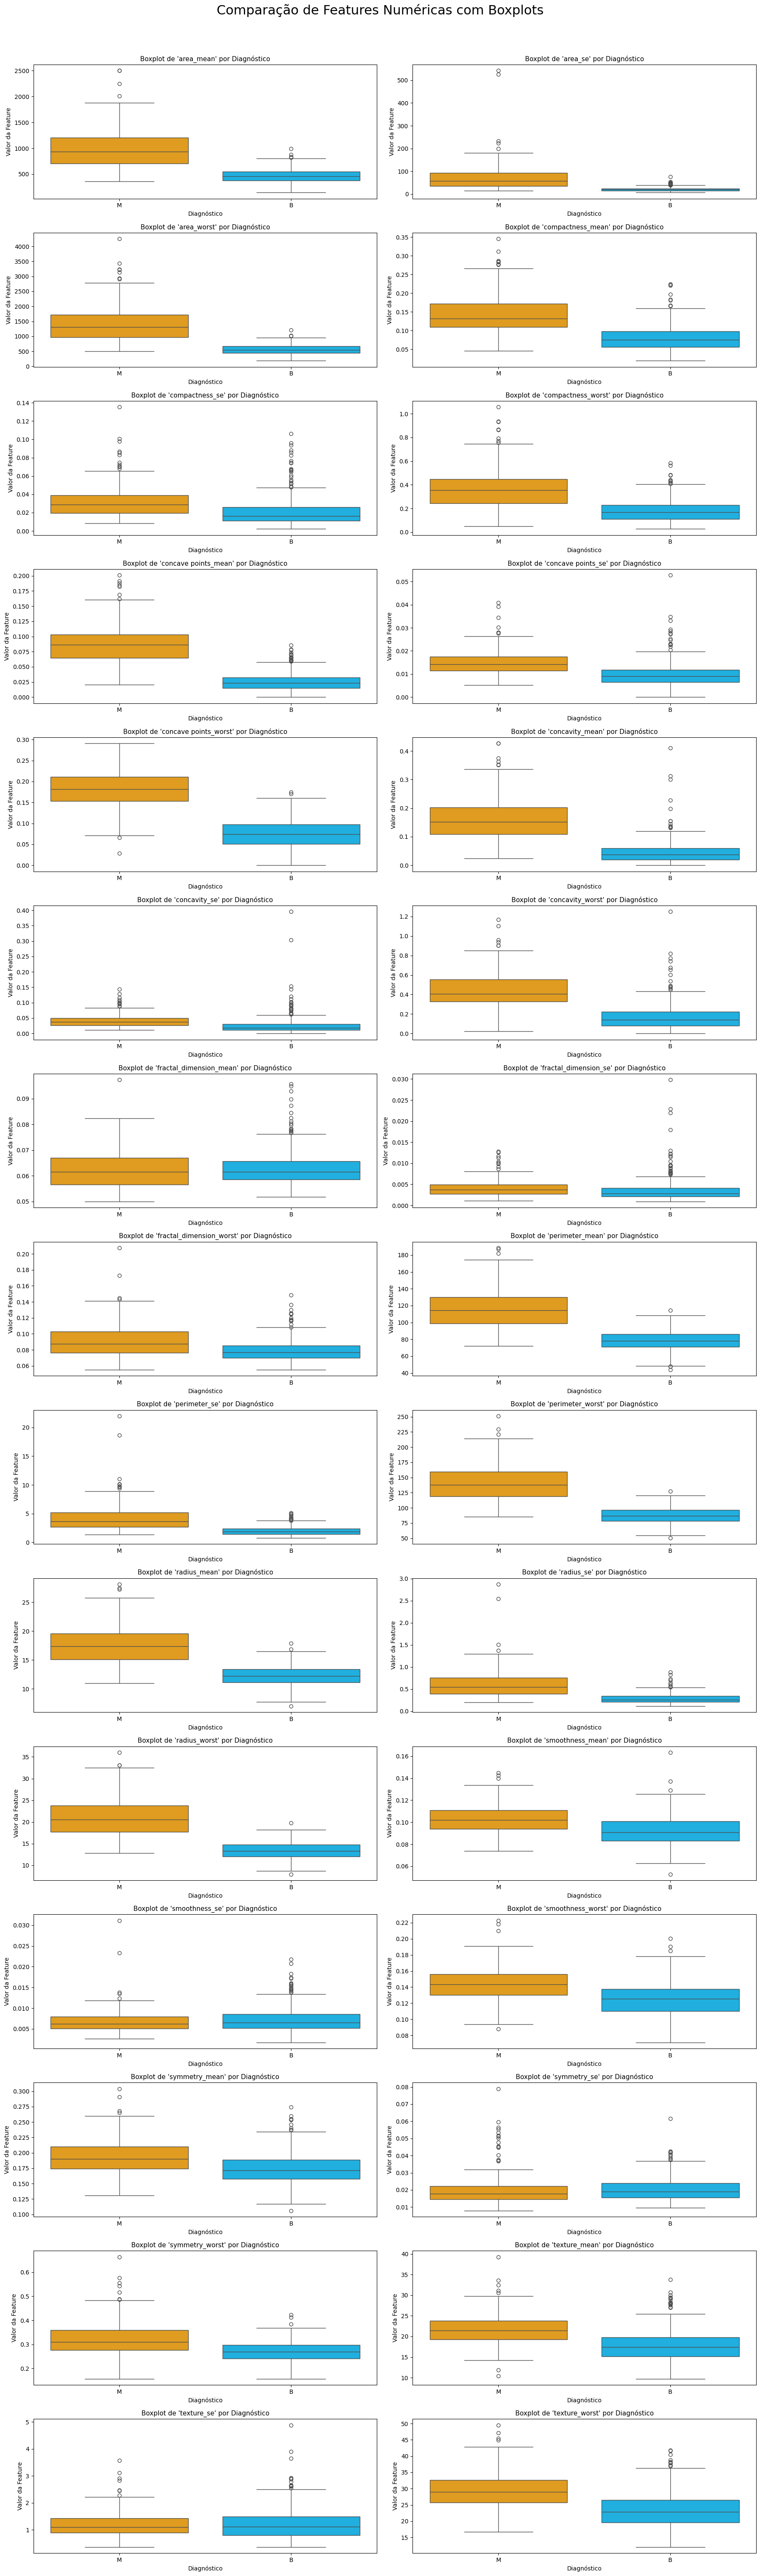

In [35]:
features_numericas = sorted(dt.select_dtypes(include=[np.number]).columns)
n_colunas = 2
n_linhas = int(np.ceil(len(features_numericas) / n_colunas))

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(18, n_linhas * 4))
axes = axes.flatten()


for idx, feature in enumerate(features_numericas):
    sns.boxplot(
        data=dt,
        x='diagnosis',
        hue='diagnosis',    # A vari√°vel categ√≥rica no eixo X cria os grupos
        y=feature,      # A vari√°vel num√©rica no eixo Y
        ax=axes[idx],   # Define em qual subplot desenhar
        palette={'B': 'deepskyblue', 'M': 'orange'} # Mesma paleta de cores
    )
    axes[idx].set_title(f"Boxplot de '{feature}' por Diagn√≥stico", fontsize=11)
    axes[idx].set_xlabel('Diagn√≥stico') # R√≥tulo do eixo X
    axes[idx].set_ylabel('Valor da Feature') # R√≥tulo do eixo Y

# Remove os eixos que n√£o foram utilizados (se houver)
# Como temos 30 features e 30 subplots (10x3), este loop n√£o far√° nada,
# mas √© uma boa pr√°tica mant√™-lo.
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

# Adiciona um t√≠tulo geral e ajusta o layout
plt.suptitle('Compara√ß√£o de Features Num√©ricas com Boxplots', fontsize=22, y=1.01)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


### An√°lise Combinada: Boxplots das Features por Diagn√≥stico

Os boxplots ampliam a an√°lise explorat√≥ria ao permitir **compara√ß√µes estat√≠sticas diretas** entre tumores benignos (B) e malignos (M). Eles **quantificam a separabilidade** observada nos histogramas e refor√ßam a distin√ß√£o entre as classes.

---

#### 1. Preditores de Alto Desempenho (Separa√ß√£o Dr√°stica)

Apresentam **separa√ß√£o estat√≠stica n√≠tida**, com pouca ou nenhuma sobreposi√ß√£o entre os intervalos interquartis (IQR).

* **Evid√™ncia:**
  Em vari√°veis como `concave points_worst`, `perimeter_worst` e `radius_worst`, o 75¬∫ percentil dos benignos √© inferior ao 25¬∫ dos malignos ‚Äî indicando **faixas de valores totalmente distintas**.
* **Exemplo:**
  `concave points_worst` mostra essa divis√£o de forma clara: benignos abaixo e malignos acima de um mesmo limiar.
* **Principais features:**
  `concave points_mean`, `concave points_worst`, `perimeter_worst`, `radius_worst`, `area_worst`, `area_mean`, `perimeter_mean`, `radius_mean`.

---

#### 2. Preditores de Desempenho Moderado (Separa√ß√£o Clara)

H√° **sobreposi√ß√£o parcial nos IQRs**, mas com **diferen√ßas consistentes nas medianas** entre as classes.

* **Evid√™ncia:**
  As medianas dos malignos s√£o sistematicamente superiores, sugerindo tend√™ncia explor√°vel na modelagem.
* **Exemplo:**
  Em `texture_mean`, apesar da sobreposi√ß√£o, a caixa dos malignos desloca-se para valores mais altos.
* **Principais features:**
  `texture_mean`, `texture_worst`, `smoothness_worst`, `compactness_worst`, `symmetry_worst`.

---

#### 3. Preditores de Baixo Desempenho (Alta Sobreposi√ß√£o)

As caixas e medianas das classes s√£o semelhantes, indicando **baixo poder discriminativo**.

* **Evid√™ncia:**
  IQRs e medianas praticamente id√™nticos, sem diferen√ßas estat√≠sticas relevantes.
* **Principais features:**
  `fractal_dimension_se`, `smoothness_se`.

---

#### 4. An√°lise de Outliers

Os boxplots evidenciam **valores extremos** que podem representar casos cl√≠nicos complexos.

* **Outliers benignos:**
  Tumores benignos com valores elevados em vari√°veis associadas √† malignidade ‚Äî casos amb√≠guos e de dif√≠cil classifica√ß√£o.
* **Outliers malignos:**
  Casos com valores muito acima da m√©dia da classe, que podem **influenciar a robustez do modelo**.

---

#### Conclus√£o

Os boxplots **confirmam e quantificam** as hip√≥teses anteriores, destacando vari√°veis com separa√ß√£o estat√≠stica consistente e refor√ßando a **viabilidade de modelos preditivos robustos**. Al√©m disso, oferecem suporte √† **sele√ß√£o de features** e ao **tratamento de outliers**.


### Analise a correla√ß√£o entre as features num√©ricas com um heatmap

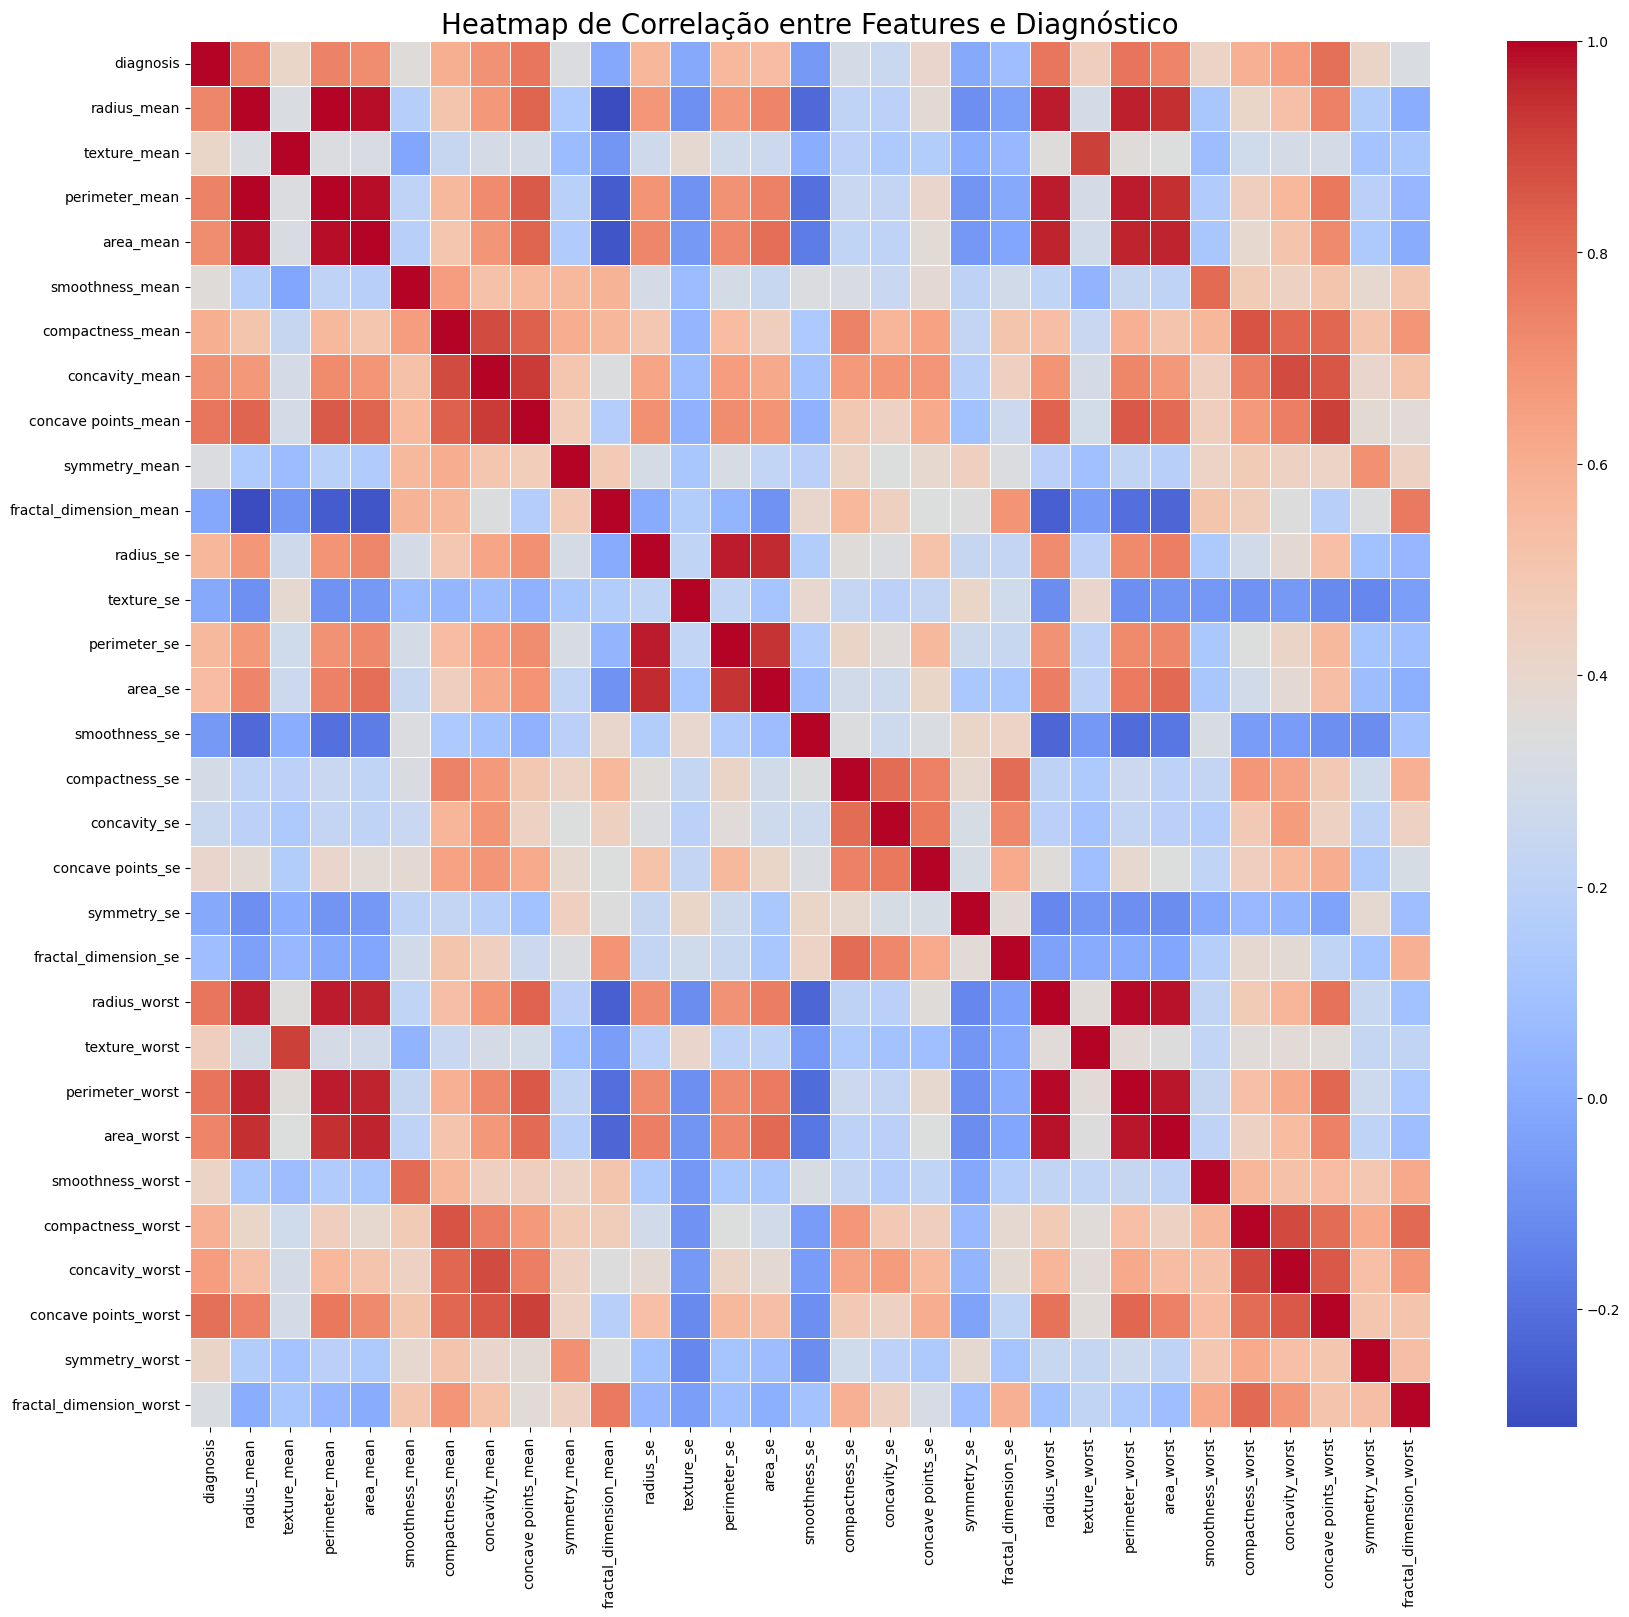

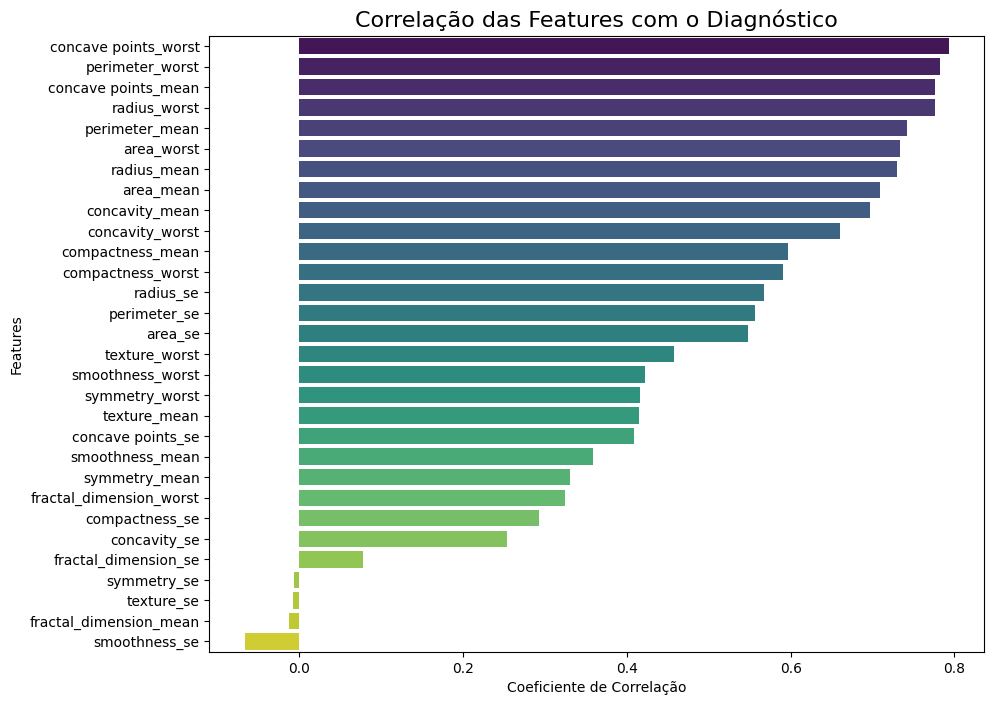

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

In [36]:

# 1. Criar uma c√≥pia do DataFrame para n√£o alterar o original
df_corr = dt.copy()

# 2. Converter a coluna 'diagnosis' para formato num√©rico
#    Mapeamos Maligno (M) para 1 e Benigno (B) para 0
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# 3. Calcular a matriz de correla√ß√£o
#    O .corr() agora incluir√° a coluna 'diagnosis'
correlation_matrix = df_corr.corr()

# 4. Gerar o heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    correlation_matrix,
    annot=False,  # Com 31x31 colunas, as anota√ß√µes seriam ileg√≠veis
    cmap='coolwarm', # Um bom mapa de cores para ver valores positivos (quentes) e negativos (frios)
    linewidths=.5
)
plt.title('Heatmap de Correla√ß√£o entre Features e Diagn√≥stico', fontsize=20)
plt.show()

# 5. (PASSO MAIS IMPORTANTE) Extrair e visualizar o ranking de correla√ß√£o com o alvo
#    Isso nos d√° o insight mais valioso da matriz inteira.
target_correlation = correlation_matrix['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='viridis')
plt.title('Correla√ß√£o das Features com o Diagn√≥stico', fontsize=16)
plt.xlabel('Coeficiente de Correla√ß√£o')
plt.ylabel('Features')
plt.show()

print(target_correlation)



### An√°lise da Matriz de Correla√ß√£o

A matriz de correla√ß√£o encerra a an√°lise explorat√≥ria, **quantificando as rela√ß√µes entre as vari√°veis** e validando os padr√µes observados. A separa√ß√£o entre correla√ß√£o com o diagn√≥stico e correla√ß√£o entre features oferece uma vis√£o completa da estrutura dos dados.

---

#### 1. Correla√ß√£o entre Features e Diagn√≥stico (Ranking dos Preditores)

O gr√°fico de barras com os coeficientes de correla√ß√£o permite identificar as vari√°veis mais relevantes para a classifica√ß√£o.

* **Alta performance (r > 0,7):**
  `concave points_worst`, `perimeter_worst`, `concave points_mean` e `radius_worst` apresentam **forte correla√ß√£o positiva** com o diagn√≥stico ‚Äî quanto maiores seus valores, maior a probabilidade de malignidade. Esses resultados **confirmam quantitativamente** os padr√µes observados nos histogramas e boxplots.

* **Baixa performance (r ‚âà 0):**
  `fractal_dimension_se`, `symmetry_se`, `texture_se` e `smoothness_se` mostram **aus√™ncia de correla√ß√£o linear**, coerente com suas distribui√ß√µes semelhantes entre as classes e **baixo poder preditivo individual**.

---

#### 2. Correla√ß√£o entre Features (Multicolinearidade)

O heatmap revela **blocos de alta correla√ß√£o** entre vari√°veis, especialmente entre `radius_mean`, `perimeter_mean`, `area_mean` e suas vers√µes `_worst`, indicando **redund√¢ncia informacional** por medirem aspectos do tamanho do tumor.

* **Implica√ß√µes para modelagem:**

  * **Redund√¢ncia:**
    Vari√°veis fortemente correlacionadas podem reduzir a efici√™ncia ou estabilidade de certos modelos.
  * **Impacto por tipo de algoritmo:**

    * *Modelos baseados em √°rvore* (ex.: Random Forest) s√£o **robustos** √† multicolinearidade.
    * *Modelos lineares* (ex.: Regress√£o Log√≠stica, SVM) podem sofrer **instabilidade nos coeficientes**, mitigada por regulariza√ß√£o L1 ou L2.

---

#### Conclus√£o

A matriz de correla√ß√£o **confirma estatisticamente** as conclus√µes anteriores: vari√°veis associadas ao **tamanho e forma do tumor** s√£o os preditores mais fortes, enquanto h√° **multicolinearidade significativa** entre elas. Esses achados orientam o **pr√©-processamento** e a **sele√ß√£o do modelo**, sustentando o potencial para construir classificadores **precisos e confi√°veis**.


### Analise a separabilidade das classes com PCA

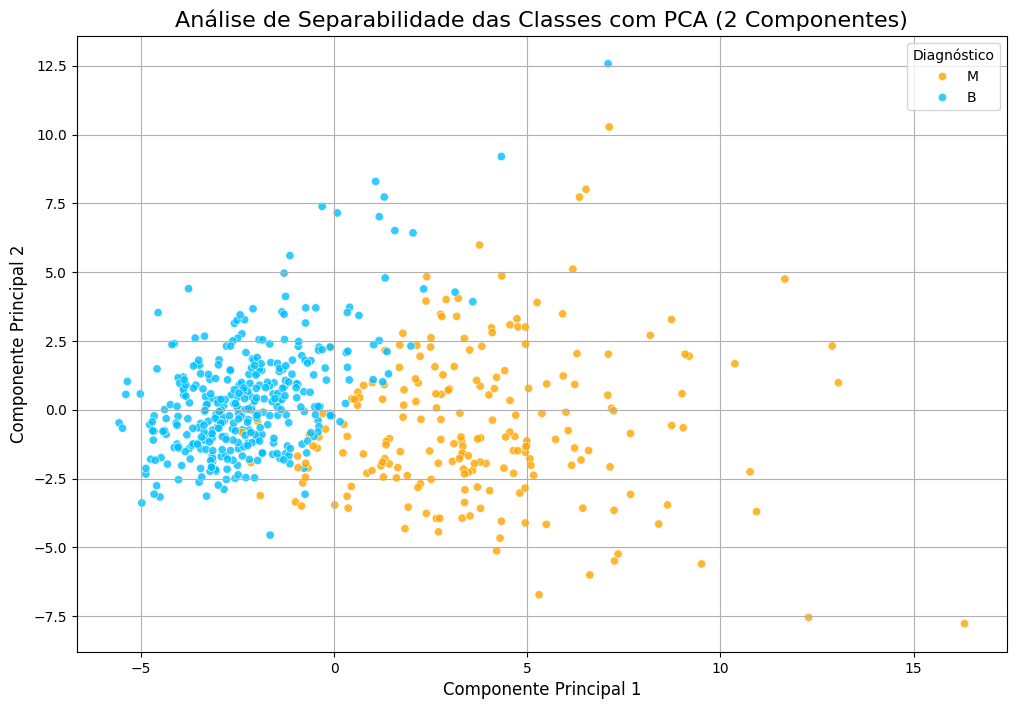

Vari√¢ncia explicada por PC1: 44.27%
Vari√¢ncia explicada por PC2: 18.97%
Vari√¢ncia total explicada pelos 2 componentes: 63.24%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 1. Separar as features (X) da vari√°vel alvo (y)
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']

# 2. (PASSO CRUCIAL) Escalonar as features
#    O PCA funciona melhor quando todas as features t√™m m√©dia 0 e desvio padr√£o 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar o PCA
#    Vamos reduzir as 30 features para apenas 2 componentes principais.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 4. Criar um novo DataFrame com os componentes principais para facilitar a visualiza√ß√£o
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Adicionar a coluna de diagn√≥stico de volta para podermos colorir os pontos
pca_df = pd.concat([pca_df, y], axis=1)



# 7. Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='diagnosis',
    data=pca_df,
    palette={'B': 'deepskyblue', 'M': 'orange'},
    alpha=0.8
)

plt.title('An√°lise de Separabilidade das Classes com PCA (2 Componentes)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Diagn√≥stico')
plt.grid()
plt.show()

# (Opcional) Verificar quanta informa√ß√£o (vari√¢ncia) os 2 componentes capturaram
explained_variance = pca.explained_variance_ratio_
print(f"Vari√¢ncia explicada por PC1: {explained_variance[0]:.2%}")
print(f"Vari√¢ncia explicada por PC2: {explained_variance[1]:.2%}")
print(f"Vari√¢ncia total explicada pelos 2 componentes: {np.sum(explained_variance):.2%}")



### An√°lise de Separabilidade com PCA

A **An√°lise de Componentes Principais (PCA)** condensa as 30 vari√°veis originais em eixos que maximizam a vari√¢ncia dos dados, revelando a estrutura latente que diferencia tumores benignos (B) e malignos (M). Al√©m de facilitar a visualiza√ß√£o, a t√©cnica evidencia a **dire√ß√£o principal de separa√ß√£o** entre as classes.

---

#### Interpreta√ß√£o do Gr√°fico de Dispers√£o

O gr√°fico de dispers√£o mostra uma **separabilidade linear clara** ao longo do **Componente Principal 1 (PC1)**. Tumores benignos concentram-se em valores negativos ou pr√≥ximos de zero, enquanto os malignos apresentam valores positivos, indicando que o PC1 √© o principal eixo associado ao diagn√≥stico.
O **PC2**, embora menos relevante para a separa√ß√£o, captura varia√ß√µes secund√°rias √∫teis para a modelagem.

A presen√ßa de **dois clusters bem definidos** confirma a exist√™ncia de uma estrutura subjacente robusta nos dados. A pequena zona de sobreposi√ß√£o representa casos amb√≠guos ‚Äî os mais dif√≠ceis de classificar corretamente.

---

#### Interpreta√ß√£o da Vari√¢ncia Explicada

Os dois primeiros componentes explicam **63,24% da vari√¢ncia total** ‚Äî sendo **44,27% atribu√≠dos ao PC1** e **18,97% ao PC2**. Essa compress√£o √© altamente eficiente, considerando o n√∫mero inicial de vari√°veis.
O **PC1** domina a explica√ß√£o da variabilidade, refletindo diretamente a distin√ß√£o entre as classes e confirmando sua relev√¢ncia como **eixo diagn√≥stico principal**.

---

#### Conclus√£o

O PCA confirma, de forma **estatisticamente consistente e visualmente clara**, a **separabilidade entre tumores benignos e malignos**. A redu√ß√£o dimensional n√£o apenas simplifica a representa√ß√£o dos dados, mas tamb√©m:

* **Melhora a interpretabilidade e efici√™ncia dos modelos**
* **Reduz ru√≠do e redund√¢ncia**
* **Fortalece a base para algoritmos supervisionados de alta acur√°cia**



###  Analisar a separabilidade das classes com PCA+Sele√ß√£o (10 features)

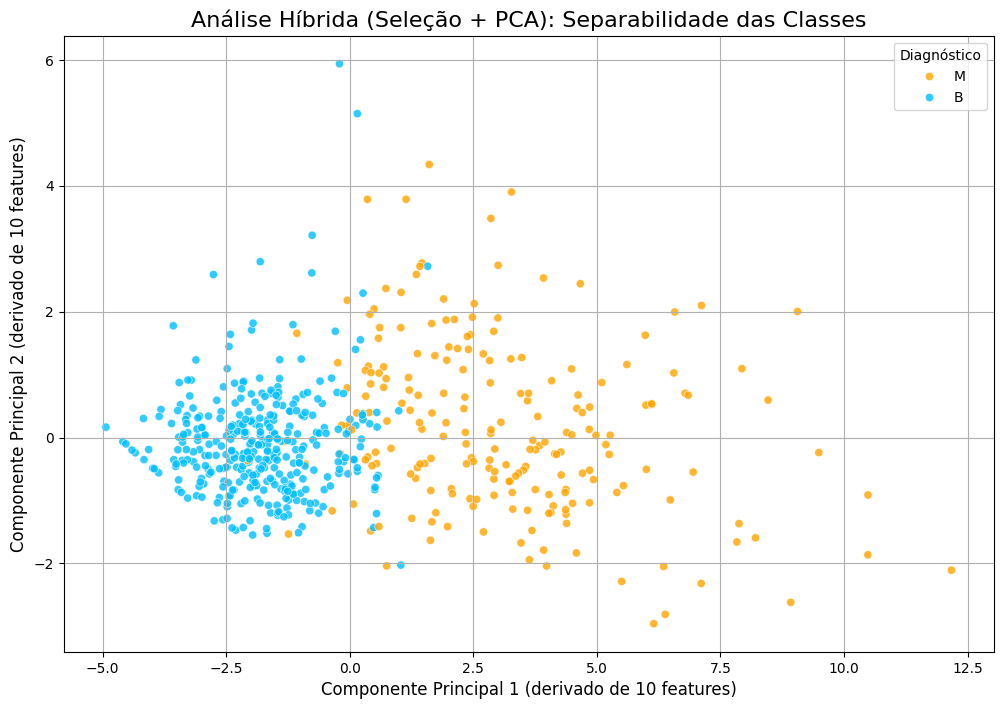

Vari√¢ncia explicada por PC1_hybrid: 84.15%
Vari√¢ncia explicada por PC2_hybrid: 11.42%
Vari√¢ncia total explicada pelos 2 componentes: 95.57%


In [38]:
# 1. (FILTRO) Selecionar as features mais correlacionadas. corr > 0.6
features_selecionadas = [
    "concave points_worst",
    "perimeter_worst",
    "concave points_mean",
    "radius_worst",
    "perimeter_mean",
    "area_worst",
    "radius_mean",
    "area_mean",
    "concavity_mean",
    "concavity_worst",
]
X_selected = dt[features_selecionadas]
y = dt["diagnosis"]  # A vari√°vel alvo permanece a mesma

# 2. Escalonar APENAS as features selecionadas
scaler_hybrid = StandardScaler()
X_selected_scaled = scaler_hybrid.fit_transform(X_selected)

# 3. (CONDENSA√á√ÉO) Aplicar PCA nas features selecionadas e escalonadas
pca_hybrid = PCA(n_components=2)  # Reduzindo as 10 features para 2 componentes
principal_components_hybrid = pca_hybrid.fit_transform(X_selected_scaled)

# 4. Criar um novo DataFrame com os componentes para visualiza√ß√£o
pca_hybrid_df = pd.DataFrame(
    data=principal_components_hybrid, columns=["PC1_hybrid", "PC2_hybrid"]
)
pca_hybrid_df = pd.concat([pca_hybrid_df, y.reset_index(drop=True)], axis=1)

# 5. Visualizar a separabilidade das classes com a abordagem h√≠brida
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PC1_hybrid",
    y="PC2_hybrid",
    hue="diagnosis",
    data=pca_hybrid_df,
    palette={"B": "deepskyblue", "M": "orange"},
    alpha=0.8,
)

plt.title("An√°lise H√≠brida (Sele√ß√£o + PCA): Separabilidade das Classes", fontsize=16)
plt.xlabel("Componente Principal 1 (derivado de 10 features)", fontsize=12)
plt.ylabel("Componente Principal 2 (derivado de 10 features)", fontsize=12)
plt.legend(title="Diagn√≥stico")
plt.grid()
plt.show()

# (Opcional) Verificar a vari√¢ncia explicada pelos componentes
explained_variance_hybrid = pca_hybrid.explained_variance_ratio_
print(f"Vari√¢ncia explicada por PC1_hybrid: {explained_variance_hybrid[0]:.2%}")
print(f"Vari√¢ncia explicada por PC2_hybrid: {explained_variance_hybrid[1]:.2%}")
print(
    f"Vari√¢ncia total explicada pelos 2 componentes: {np.sum(explained_variance_hybrid):.2%}"
)



### An√°lise Comparativa e Combinada: PCA H√≠brido (Sele√ß√£o + Redu√ß√£o)

A abordagem h√≠brida, aqui combinamo a sele√ß√£o de features mais correlacionadas com redu√ß√£o dimensional via PCA, mostrou-se mais eficiente do que aplicar o PCA diretamente sobre todas as vari√°veis. Essa estrat√©gia reduz ru√≠do, concentra o sinal preditivo e melhora a capacidade de compress√£o dos dados.

A hip√≥tese testada √© que, ao eliminar features ruidosas ou pouco preditivas antes do PCA, a t√©cnica consegue focar na vari√¢ncia realmente relevante para distinguir as classes, resultando em uma representa√ß√£o bidimensional mais clara e informativa.

Na compara√ß√£o entre estrat√©gias, o PCA completo, aplicado √†s 30 vari√°veis, explicou 63,24% da vari√¢ncia total nas duas primeiras componentes. J√° o PCA h√≠brido, com apenas 10 features selecionadas, explicou 95,47% ‚Äî evidenciando que a maior parte da vari√¢ncia relevante est√° concentrada nas vari√°veis mais preditivas, enquanto as demais adicionam ru√≠do e dificultam a compress√£o eficiente.

No PCA h√≠brido, o primeiro componente (PC1_hybrid) explica 84,44% da vari√¢ncia e representa o eixo da malignidade. Ele sintetiza as fortes correla√ß√µes entre vari√°veis relacionadas ao tamanho, forma e irregularidade do tumor, condensando informa√ß√µes redundantes em uma dimens√£o altamente informativa. O segundo componente (PC2_hybrid), respons√°vel por 11,03% da vari√¢ncia, captura padr√µes complementares e independentes, √∫teis para diferenciar casos mais amb√≠guos. Juntos, os dois componentes representam 95,47% da estrutura preditiva dos dados, alcan√ßando alta efici√™ncia com m√≠nima perda de informa√ß√£o.

A an√°lise demonstra que remover vari√°veis irrelevantes ou redundantes antes do PCA potencializa a redu√ß√£o dimensional. Focando nas features mais informativas, o PCA extrai componentes representativos, simplifica o espa√ßo de decis√£o e melhora a separabilidade entre classes.


###  An√°lise da Visualiza√ß√£o com t-SNE


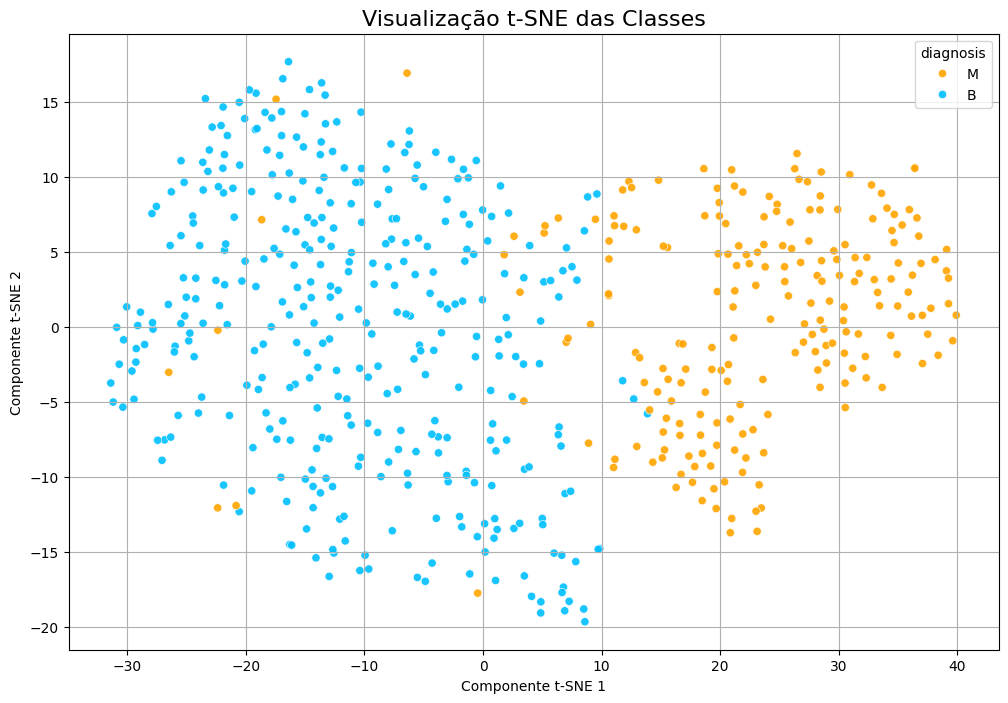

In [ ]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assumindo que 'dt' √© seu DataFrame original e 'X' e 'y' j√° foram separados
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']

# 1. Escalonar os dados √© um pr√©-requisito
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Instanciar e aplicar o t-SNE
#    'perplexity' √© o hiperpar√¢metro mais importante. Pense nele como o n√∫mero
#    de vizinhos que cada ponto considera. Valores comuns est√£o entre 5 e 50.
#    'random_state' √© crucial para a reprodutibilidade.
# Instancia o t-SNE sem o argumento n_iter para evitar erro de vers√£o
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

# 3. Criar um DataFrame para visualiza√ß√£o
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df = pd.concat([tsne_df, y.reset_index(drop=True)], axis=1)

# 4. Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='diagnosis', data=tsne_df,
    palette={'B': 'deepskyblue', 'M': 'orange'}, alpha=0.9
)
plt.title('Visualiza√ß√£o t-SNE das Classes', fontsize=16)
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.grid()
plt.show()



### An√°lise da Visualiza√ß√£o com t-SNE

A aplica√ß√£o do t-SNE (t-Distributed Stochastic Neighbor Embedding) fornece uma vis√£o n√£o linear da estrutura dos dados, projetando o espa√ßo original de 30 dimens√µes em um plano bidimensional. Essa proje√ß√£o revela de forma clara a separabilidade entre as classes.

O t-SNE √© utilizado aqui apenas para visualiza√ß√£o, oferecendo uma perspectiva mais intuitiva sobre a forma√ß√£o de clusters. Ele responde √† quest√£o: se ignorarmos as rela√ß√µes lineares e considerarmos apenas a proximidade entre os pontos, as classes ainda formam grupos distintos? Uma separa√ß√£o evidente nesse espa√ßo indica forte separabilidade intr√≠nseca nos dados.

Diferente do PCA, que √© linear e preserva a vari√¢ncia global, o t-SNE √© n√£o linear e foca na preserva√ß√£o das rela√ß√µes locais. Enquanto o PCA busca resumir a estrutura global dos dados por meio de componentes ortogonais, o t-SNE prioriza manter pr√≥ximos, na proje√ß√£o 2D, os pontos que j√° eram vizinhos no espa√ßo original, mesmo que distor√ßa as dist√¢ncias globais.

A visualiza√ß√£o obtida mostra dois agrupamentos bem definidos: tumores benignos e malignos formam clusters distintos e coesos. O grupo maligno apresenta estrutura compacta e bem delimitada, enquanto o benigno mant√©m forte coes√£o e fronteiras visivelmente separadas. A sobreposi√ß√£o entre classes √© m√≠nima, indicando que casos amb√≠guos s√£o raros e que h√° uma estrutura latente clara distinguindo as categorias.

√â importante destacar que, em t-SNE, as dist√¢ncias entre clusters e o tamanho relativo dos grupos n√£o devem ser interpretados literalmente. O foco est√° na exist√™ncia e na pureza dos agrupamentos, n√£o na escala espacial entre eles.

Em s√≠ntese, o t-SNE confirma visualmente que os dados s√£o altamente separ√°veis, mesmo sem supervis√£o. Isso implica que modelos lineares, como Regress√£o Log√≠stica e SVM linear, devem apresentar bom desempenho, enquanto m√©todos n√£o lineares, como SVM com kernel RBF, k-NN e redes neurais, podem explorar ainda melhor as fronteiras sutis entre classes. O fato de o t-SNE evidenciar essa separa√ß√£o sem usar r√≥tulos refor√ßa a robustez e a consist√™ncia estrutural do conjunto de dados para tarefas de classifica√ß√£o.


## Etapa 3: Prepara√ß√£o e Pr√©-processamento dos Dados

-----------------------------------

### **Treino e avalia√ß√£o dos modelos**

Esta etapa consiste em:

- Treinar o modelo com os dados de treino escalonados
- Realizar previs√µes com o conjunto de teste
- Calcular e analisar as m√©tricas de classifica√ß√£o (Acur√°cia, Precis√£o, Recall, F1-Score, AUC)
- Gerar e visualizar a Matriz de Confus√£o


Ao dividir os dados, nosso objetivo √© criar um conjunto de treino que seja uma boa representa√ß√£o do problema original e um conjunto de teste que sirva como uma avalia√ß√£o justa e representativa do desempenho do modelo. Em um dataset desbalanceado, uma divis√£o puramente aleat√≥ria pode, por azar, criar conjuntos n√£o representativos. O par√¢metro stratify=y_num resolve isso for√ßando a divis√£o a manter a mesma propor√ß√£o de classes (62.74% B / 37.26% M) tanto no conjunto de treino quanto no de teste.

### Etapa 1: Preparar os Dados

Separar as features (X) da vari√°vel alvo (y) e converter a vari√°vel alvo para um formato num√©rico (0 para Benigno e 1 para Maligno).

In [40]:
# 1. Separar features (X) e vari√°vel alvo (y)
# X j√° foi definido em uma c√©lula anterior como dt.drop(columns=['diagnosis'])
# y j√° foi definido em uma c√©lula anterior como dt['diagnosis']

# 2. Converter a vari√°vel alvo 'diagnosis' para num√©rica
#    'M' (Maligno) -> 1, 'B' (Benigno) -> 0
y_num = y.map({'M': 1, 'B': 0})

# Imprimir a distribui√ß√£o de 0s e 1s na vari√°vel alvo binarizada
print("Distribui√ß√£o da vari√°vel alvo binarizada (0: Benigno, 1: Maligno):")
print(y_num.value_counts())


Distribui√ß√£o da vari√°vel alvo binarizada (0: Benigno, 1: Maligno):
diagnosis
0    357
1    212
Name: count, dtype: int64


## Dividir os dados em treino e teste

Dividindo os dados em treino e teste, garantindo que a propor√ß√£o das classes na vari√°vel alvo ('diagnosis' binarizada em `y_num`) seja mantida em ambos os conjuntos.

In [ ]:
# Dividindo os dados em treino e teste, garantindo a propor√ß√£o das classes com stratify=y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y
)

print("Shape dos conjuntos de treino:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShape dos conjuntos de teste:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Verificar a distribui√ß√£o das classes nos novos conjuntos (apenas para y)
print("\nDistribui√ß√£o das classes em y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribui√ß√£o das classes em y_test:")
print(y_test.value_counts(normalize=True))

Shape dos conjuntos de treino:
X_train: (426, 30)
y_train: (426,)

Shape dos conjuntos de teste:
X_test: (143, 30)
y_test: (143,)

Distribui√ß√£o das classes em y_train:
diagnosis
B    0.626761
M    0.373239
Name: proportion, dtype: float64

Distribui√ß√£o das classes em y_test:
diagnosis
B    0.629371
M    0.370629
Name: proportion, dtype: float64


### Normalizando os dados

In [42]:
# Escalonar APENAS as features (X) usando StandardScaler
# √â crucial ajustar o scaler SOMENTE nos dados de treino para evitar vazamento de dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Aplicar a mesma transforma√ß√£o nos dados de teste

# Converter a vari√°vel alvo 'diagnosis' para num√©rica para os conjuntos de treino e teste
# 'M' (Maligno) -> 1, 'B' (Benigno) -> 0
y_train_num = y_train.map({'M': 1, 'B': 0})
y_test_num = y_test.map({'M': 1, 'B': 0})

## Etapa 4: Aplica√ß√£o do Modelo de Machine Learning

### Dummy classifier - estratificado

=== Relat√≥rio de Classifica√ß√£o (Dummy Classifier - Stratified) ===
              precision    recall  f1-score   support

     Benigno       0.66      0.68      0.67        90
     Maligno       0.42      0.40      0.41        53

    accuracy                           0.57       143
   macro avg       0.54      0.54      0.54       143
weighted avg       0.57      0.57      0.57       143


=== Matriz de Confus√£o (Dummy Classifier - Stratified) ===
[[61 29]
 [32 21]]


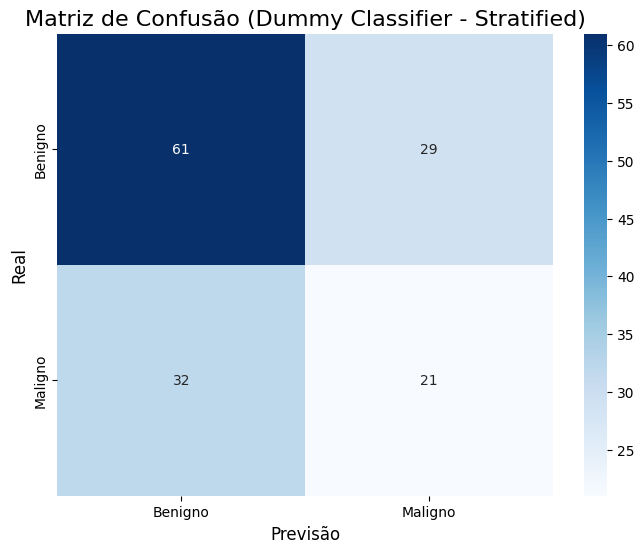


=== AUC (Area Under the ROC Curve) (Dummy Classifier - Stratified) ===
AUC: 0.5370


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier # Importando o classificador
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Importando o Support Vector CLASSIFIER


# 1. Instantiate a DummyClassifier model
dummy_model = DummyClassifier(strategy="stratified", random_state=42)

# 2. Train the Dummy Classifier model
dummy_model.fit(X_train_scaled, y_train_num)

# 3. Make predictions on the scaled test data
y_pred_dummy_num = dummy_model.predict(X_test_scaled)

# 4. Calculate predicted probabilities for the positive class (if available)
y_pred_dummy_proba = None
if hasattr(dummy_model, "predict_proba"):
    y_pred_dummy_proba = dummy_model.predict_proba(X_test_scaled)[:, 1]


# 5. Print the classification report
print("=== Relat√≥rio de Classifica√ß√£o (Dummy Classifier - Stratified) ===")
print(classification_report(y_test_num, y_pred_dummy_num, target_names=['Benigno', 'Maligno'], zero_division=0))

# 6. Calculate the confusion matrix
cm_dummy = confusion_matrix(y_test_num, y_pred_dummy_num)

# 7. Print the confusion matrix
print("\n=== Matriz de Confus√£o (Dummy Classifier - Stratified) ===")
print(cm_dummy)

# 8. Generate and visualize the Matriz de Confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confus√£o (Dummy Classifier - Stratified)', fontsize=16)
plt.xlabel('Previs√£o', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# 9. Calculate and print the AUC (if probabilities were calculated)
if y_pred_dummy_proba is not None:
    auc_dummy = roc_auc_score(y_test_num, y_pred_dummy_proba)
    print(f"\n=== AUC (Area Under the ROC Curve) (Dummy Classifier - Stratified) ===")
    print(f"AUC: {auc_dummy:.4f}")

## Perceptron


=== Relat√≥rio de Classifica√ß√£o (Perceptron) ===
              precision    recall  f1-score   support

     Benigno       0.97      1.00      0.98        90
     Maligno       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143


=== Matriz de Confus√£o (Perceptron) ===
[[90  0]
 [ 3 50]]


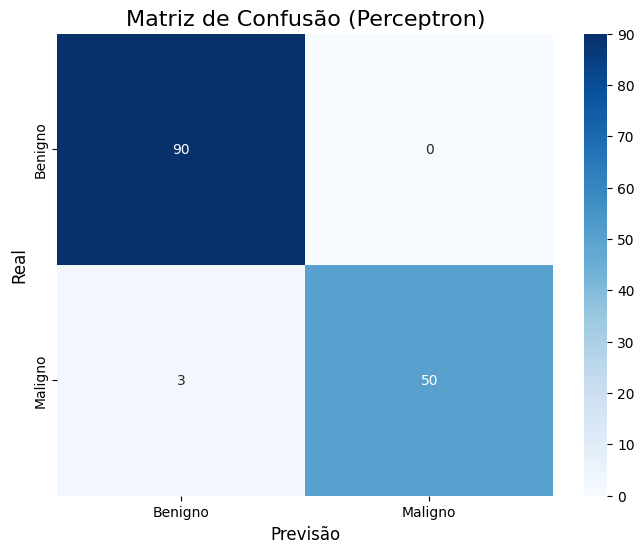

In [43]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instanciar o modelo Perceptron
perceptron_model = Perceptron(random_state=42)

# 2. Treinar o modelo Perceptron
perceptron_model.fit(X_train_scaled, y_train_num)

# 3. Realizar previs√µes nos dados de teste escalonados
y_pred_perceptron_num = perceptron_model.predict(X_test_scaled)

# 4. Imprimir o relat√≥rio de classifica√ß√£o
print("=== Relat√≥rio de Classifica√ß√£o (Perceptron) ===")
print(classification_report(y_test_num, y_pred_perceptron_num, target_names=['Benigno', 'Maligno']))

# 5. Calcular a matriz de confus√£o
cm_perceptron = confusion_matrix(y_test_num, y_pred_perceptron_num)

# 6. Imprimir a matriz de confus√£o
print("\n=== Matriz de Confus√£o (Perceptron) ===")
print(cm_perceptron)

# 7. Gerar e visualizar a Matriz de Confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confus√£o (Perceptron)', fontsize=16)
plt.xlabel('Previs√£o', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

## Random Forest

=== Relat√≥rio de Classifica√ß√£o (Random Forest) ===
              precision    recall  f1-score   support

     Benigno       0.95      1.00      0.97        90
     Maligno       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143


=== Matriz de Confus√£o (Random Forest) ===
[[90  0]
 [ 5 48]]


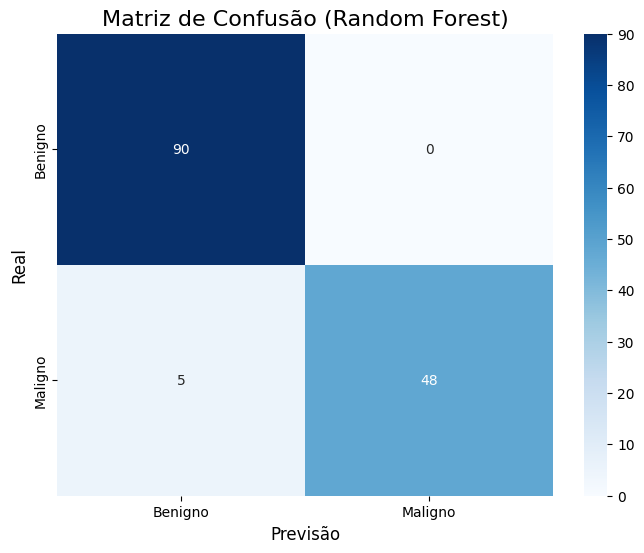


=== AUC (Area Under the ROC Curve) (Random Forest) ===
AUC: 0.9945


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instantiate a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the Random Forest model
rf_model.fit(X_train_scaled, y_train_num)

# 3. Make predictions on the scaled test data
y_pred_rf_num = rf_model.predict(X_test_scaled)

# 4. Calculate predicted probabilities for the positive class
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 5. Print the classification report
print("=== Relat√≥rio de Classifica√ß√£o (Random Forest) ===")
print(classification_report(y_test_num, y_pred_rf_num, target_names=['Benigno', 'Maligno']))

# 6. Calculate the confusion matrix
cm_rf = confusion_matrix(y_test_num, y_pred_rf_num)

# 7. Print the confusion matrix
print("\n=== Matriz de Confus√£o (Random Forest) ===")
print(cm_rf)

# 8. Generate and visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confus√£o (Random Forest)', fontsize=16)
plt.xlabel('Previs√£o', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# 9. Calculate and print the AUC
auc_rf = roc_auc_score(y_test_num, y_pred_rf_proba)
print(f"\n=== AUC (Area Under the ROC Curve) (Random Forest) ===")
print(f"AUC: {auc_rf:.4f}")

## K-neighbors classifier

=== Relat√≥rio de Classifica√ß√£o (K-Neighbors Classifier) ===
              precision    recall  f1-score   support

     Benigno       0.95      0.99      0.97        90
     Maligno       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143


=== Matriz de Confus√£o (K-Neighbors Classifier) ===
[[89  1]
 [ 5 48]]


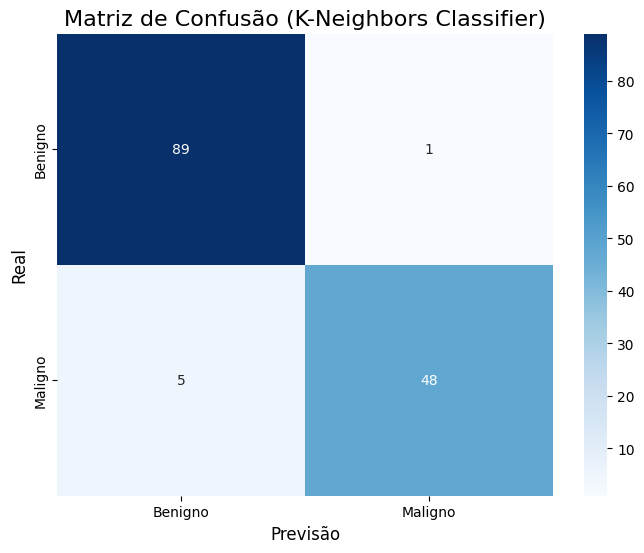


=== AUC (Area Under the ROC Curve) (K-Neighbors Classifier) ===
AUC: 0.9860


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instanciar o modelo K-Neighbors Classifier
# KNeighborsClassifier n√£o suporta random_state diretamente no construtor para este fim.
knn_model = KNeighborsClassifier()

# 2. Treinar o modelo K-Neighbors Classifier
knn_model.fit(X_train_scaled, y_train_num)

# 3. Realizar previs√µes nos dados de teste escalonados
y_pred_knn_num = knn_model.predict(X_test_scaled)

# 4. Calcular probabilidades para a classe positiva
y_pred_knn_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

# 5. Imprimir o relat√≥rio de classifica√ß√£o
print("=== Relat√≥rio de Classifica√ß√£o (K-Neighbors Classifier) ===")
print(classification_report(y_test_num, y_pred_knn_num, target_names=['Benigno', 'Maligno']))

# 6. Calcular a matriz de confus√£o
cm_knn = confusion_matrix(y_test_num, y_pred_knn_num)

# 7. Imprimir a matriz de confus√£o
print("\n=== Matriz de Confus√£o (K-Neighbors Classifier) ===")
print(cm_knn)

# 8. Gerar e visualizar a Matriz de Confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confus√£o (K-Neighbors Classifier)', fontsize=16)
plt.xlabel('Previs√£o', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# 9. Calcular e imprimir a AUC
auc_knn = roc_auc_score(y_test_num, y_pred_knn_proba)
print(f"\n=== AUC (Area Under the ROC Curve) (K-Neighbors Classifier) ===")
print(f"AUC: {auc_knn:.4f}")

## Regress√£o log√≠stica

=== Relat√≥rio de Classifica√ß√£o ===
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        90
     Maligno       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


=== Matriz de Confus√£o ===
[[89  1]
 [ 4 49]]


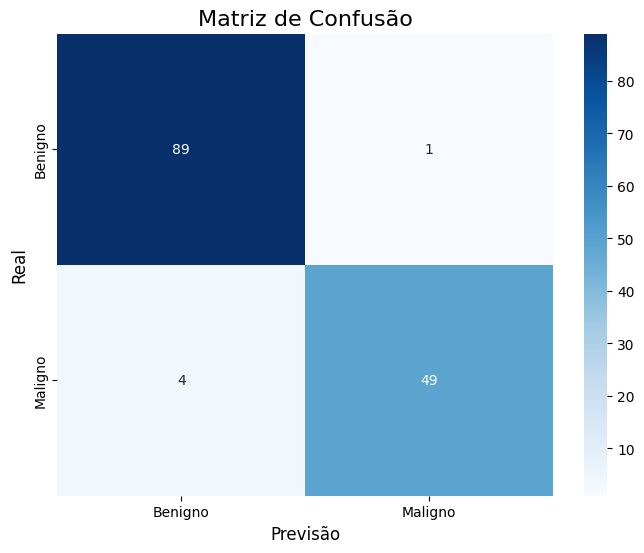


=== AUC (Area Under the ROC Curve) ===
AUC: 0.9962


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 4. Escalonar APENAS as features (X) usando StandardScaler
#    √â crucial ajustar o scaler SOMENTE nos dados de treino para evitar vazamento de dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Aplicar a mesma transforma√ß√£o nos dados de teste

# 5. Instanciar e treinar o modelo de Regress√£o Log√≠stica
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_num)

# 6. Realizar previs√µes nos dados de teste escalonados
y_pred_num = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilidades para a classe positiva (Maligno)

# 7. Avaliar o modelo
print("=== Relat√≥rio de Classifica√ß√£o ===")
print(classification_report(y_test_num, y_pred_num, target_names=['Benigno', 'Maligno']))

print("\n=== Matriz de Confus√£o ===")
cm = confusion_matrix(y_test_num, y_pred_num)
print(cm)

# Visualizar a Matriz de Confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confus√£o', fontsize=16)
plt.xlabel('Previs√£o', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()


# Calcular e imprimir a AUC
auc = roc_auc_score(y_test_num, y_pred_proba)
print(f"\n=== AUC (Area Under the ROC Curve) ===")
print(f"AUC: {auc:.4f}")

## Comparar resultados

Compara√ß√£o das m√©tricas de avalia√ß√£o (Acur√°cia, Precis√£o, Recall, F1-Score e AUC) obtidas para cada um dos modelos avaliados individualmente, apresentando um resumo comparativo.

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

model_comparison = {
    "Regress√£o Log√≠stica": {
        "Acur√°cia": accuracy_score(y_test_num, model.predict(X_test_scaled)),
        "Precis√£o": precision_score(y_test_num, model.predict(X_test_scaled)),
        "Recall": recall_score(y_test_num, model.predict(X_test_scaled)),
        "F1-Score": f1_score(y_test_num, model.predict(X_test_scaled)),
        "AUC": roc_auc_score(y_test_num, model.predict_proba(X_test_scaled)[:, 1])
    },
    "Perceptron": {
        "Acur√°cia": accuracy_score(y_test_num, y_pred_perceptron_num),
        "Precis√£o": precision_score(y_test_num, y_pred_perceptron_num),
        "Recall": recall_score(y_test_num, y_pred_perceptron_num),
        "F1-Score": f1_score(y_test_num, y_pred_perceptron_num),
        "AUC": "N/A" # Perceptron does not have predict_proba for AUC
    },
    "Random Forest": {
        "Acur√°cia": accuracy_score(y_test_num, y_pred_rf_num),
        "Precis√£o": precision_score(y_test_num, y_pred_rf_num),
        "Recall": recall_score(y_test_num, y_pred_rf_num),
        "F1-Score": f1_score(y_test_num, y_pred_rf_num),
        "AUC": roc_auc_score(y_test_num, y_pred_rf_proba)
    },
    "Dummy Classifier (Estratificado)": {
        "Acur√°cia": accuracy_score(y_test_num, y_pred_dummy_num),
        "Precis√£o": precision_score(y_test_num, y_pred_dummy_num, zero_division=0),
        "Recall": recall_score(y_test_num, y_pred_dummy_num, zero_division=0),
        "F1-Score": f1_score(y_test_num, y_pred_dummy_num, zero_division=0),
        "AUC": auc_dummy # AUC was calculated for Dummy Classifier
    },
     "K-Neighbors Classifier": {
        "Acur√°cia": accuracy_score(y_test_num, y_pred_knn_num),
        "Precis√£o": precision_score(y_test_num, y_pred_knn_num),
        "Recall": recall_score(y_test_num, y_pred_knn_num),
        "F1-Score": f1_score(y_test_num, y_pred_knn_num),
        "AUC": roc_auc_score(y_test_num, y_pred_knn_proba)
    }
}


model_comparison_df = pd.DataFrame(model_comparison).T
print("=== Resumo Comparativo das M√©tricas de Avalia√ß√£o dos Modelos ===")
display(model_comparison_df)

=== Resumo Comparativo das M√©tricas de Avalia√ß√£o dos Modelos ===


Acur√°cia  Precis√£o    Recall  F1-Score  \
Regress√£o Log√≠stica               0.965035      0.98  0.924528  0.951456   
Perceptron                        0.979021       1.0  0.943396  0.970874   
Random Forest                     0.965035       1.0   0.90566  0.950495   
Dummy Classifier (Estratificado)  0.573427      0.42  0.396226  0.407767   
K-Neighbors Classifier            0.958042  0.979592   0.90566  0.941176   

                                       AUC  
Regress√£o Log√≠stica               0.996226  
Perceptron                             N/A  
Random Forest                     0.994549  
Dummy Classifier (Estratificado)  0.537002  
K-Neighbors Classifier            0.985954

## Avalia√ß√£o da Regress√£o Log√≠stica com Valida√ß√£o Cruzada K-Fold

Valida√ß√£o cruzada K-Fold para o modelo de Regress√£o Log√≠stica e compara√ß√£o das m√©tricas com a avalia√ß√£o obtida a partir de uma √∫nica divis√£o treino/teste.

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# N√∫mero de folds para a valida√ß√£o cruzada
n_splits = 5

# Inicializar o StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para armazenar as m√©tricas de cada fold para a Regress√£o Log√≠stica
lr_fold_accuracy = []
lr_fold_precision = []
lr_fold_recall = []
lr_fold_f1 = []
lr_fold_auc = []

# Instanciar o modelo de Regress√£o Log√≠stica
lr_model = LogisticRegression(random_state=42)

print(f"Avaliando modelo: Regress√£o Log√≠stica com {n_splits}-Fold Cross-Validation")

# Iterar sobre os folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y_num)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold_num, y_test_fold_num = y_num.iloc[train_index], y_num.iloc[test_index]

    # Escalonar os dados DENTRO do loop do fold
    scaler_fold = StandardScaler()
    X_train_fold_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler_fold.transform(X_test_fold)

    # Treinar o modelo no fold de treino escalonado
    lr_model.fit(X_train_fold_scaled, y_train_fold_num)

    # Fazer previs√µes no fold de teste escalonado
    y_pred_fold_num = lr_model.predict(X_test_fold_scaled)
    y_pred_fold_proba = lr_model.predict_proba(X_test_fold_scaled)[:, 1]

    # Calcular m√©tricas para o fold atual
    acc = accuracy_score(y_test_fold_num, y_pred_fold_num)
    prec = precision_score(y_test_fold_num, y_pred_fold_num, zero_division=0)
    rec = recall_score(y_test_fold_num, y_pred_fold_num, zero_division=0)
    f1 = f1_score(y_test_fold_num, y_pred_fold_num, zero_division=0)
    auc_score = roc_auc_score(y_test_fold_num, y_pred_fold_proba)

    # Armazenar as m√©tricas do fold
    lr_fold_accuracy.append(acc)
    lr_fold_precision.append(prec)
    lr_fold_recall.append(rec)
    lr_fold_f1.append(f1)
    lr_fold_auc.append(auc_score)

    print(f"  Fold {fold + 1}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}, AUC={auc_score:.4f}")

# Calcular as m√©tricas m√©dias e desvio padr√£o da valida√ß√£o cruzada
lr_mean_accuracy = np.mean(lr_fold_accuracy)
lr_std_accuracy = np.std(lr_fold_accuracy)
lr_mean_precision = np.mean(lr_fold_precision)
lr_std_precision = np.std(lr_fold_precision)
lr_mean_recall = np.mean(lr_fold_recall)
lr_std_recall = np.std(lr_fold_recall)
lr_mean_f1 = np.mean(lr_fold_f1)
lr_std_f1 = np.std(lr_fold_f1)
lr_mean_auc = np.mean(lr_fold_auc)
lr_std_auc = np.std(lr_fold_auc)


print("\n=== M√©tricas M√©dias (Valida√ß√£o Cruzada) ===")
print(f"  Acur√°cia: {lr_mean_accuracy:.4f} ¬± {lr_std_accuracy:.4f}")
print(f"  Precis√£o: {lr_mean_precision:.4f} ¬± {lr_std_precision:.4f}")
print(f"  Recall: {lr_mean_recall:.4f} ¬± {lr_std_recall:.4f}")
print(f"  F1-Score: {lr_mean_f1:.4f} ¬± {lr_std_f1:.4f}")
print(f"  AUC: {lr_mean_auc:.4f} ¬± {lr_std_auc:.4f}")

# Obter as m√©tricas da avalia√ß√£o com uma √∫nica divis√£o (assumindo que 'model_comparison' DataFrame est√° dispon√≠vel)
# Certifique-se de que o DataFrame model_comparison_df foi gerado na c√©lula 17b754a9
if 'model_comparison_df' in globals():
    single_split_metrics = model_comparison_df.loc['Regress√£o Log√≠stica']

    print("\n=== Compara√ß√£o: Valida√ß√£o Cruzada vs. √önica Divis√£o ===")
    comparison_data = {
        "M√©trica": ["Acur√°cia", "Precis√£o", "Recall", "F1-Score", "AUC"],
        "Valida√ß√£o Cruzada (M√©dia ¬± Std)": [
            f"{lr_mean_accuracy:.4f} ¬± {lr_std_accuracy:.4f}",
            f"{lr_mean_precision:.4f} ¬± {lr_std_precision:.4f}",
            f"{lr_mean_recall:.4f} ¬± {lr_std_recall:.4f}",
            f"{lr_mean_f1:.4f} ¬± {lr_std_f1:.4f}",
            f"{lr_mean_auc:.4f} ¬± {lr_std_auc:.4f}"
        ],
        "√önica Divis√£o": [
            f"{single_split_metrics['Acur√°cia']:.4f}",
            f"{single_split_metrics['Precis√£o']:.4f}",
            f"{single_split_metrics['Recall']:.4f}",
            f"{single_split_metrics['F1-Score']:.4f}",
            f"{single_split_metrics['AUC']:.4f}" # Assuming AUC is numeric in single_split_metrics
        ]
    }
    comparison_df = pd.DataFrame(comparison_data)
    display(comparison_df)
else:
    print("\nDataFrame 'model_comparison_df' n√£o encontrado. Execute a c√©lula de compara√ß√£o de resultados (17b754a9) primeiro para ver a compara√ß√£o.")

Avaliando modelo: Regress√£o Log√≠stica com 5-Fold Cross-Validation
  Fold 1: Acc=0.9737, Prec=0.9545, Rec=0.9767, F1=0.9655, AUC=0.9951
  Fold 2: Acc=0.9474, Prec=1.0000, Rec=0.8605, F1=0.9250, AUC=0.9977
  Fold 3: Acc=0.9649, Prec=1.0000, Rec=0.9048, F1=0.9500, AUC=0.9851
  Fold 4: Acc=0.9912, Prec=0.9767, Rec=1.0000, F1=0.9882, AUC=1.0000
  Fold 5: Acc=0.9912, Prec=1.0000, Rec=0.9762, F1=0.9880, AUC=0.9987

=== M√©tricas M√©dias (Valida√ß√£o Cruzada) ===
  Acur√°cia: 0.9737 ¬± 0.0166
  Precis√£o: 0.9863 ¬± 0.0182
  Recall: 0.9436 ¬± 0.0525
  F1-Score: 0.9633 ¬± 0.0240
  AUC: 0.9953 ¬± 0.0053

=== Compara√ß√£o: Valida√ß√£o Cruzada vs. √önica Divis√£o ===


M√©trica Valida√ß√£o Cruzada (M√©dia ¬± Std) √önica Divis√£o
0  Acur√°cia                 0.9737 ¬± 0.0166        0.9650
1  Precis√£o                 0.9863 ¬± 0.0182        0.9800
2    Recall                 0.9436 ¬± 0.0525        0.9245
3  F1-Score                 0.9633 ¬± 0.0240        0.9515
4       AUC                 0.9953 ¬± 0.0053        0.9962

---


## Support Vector Classifier (SVC)

In [55]:
# --- ETAPA 1 e 2 (Resumida): Carregamento e Limpeza ---
print("--- Iniciando o processo: Carregamento e Limpeza ---")
try:
    file_path = "data.csv"

    # Load the latest version
    dt = kagglehub.dataset_load(
      KaggleDatasetAdapter.PANDAS,
      "uciml/breast-cancer-wisconsin-data",
      file_path,
      # Provide any additional arguments like
      # sql_query or pandas_kwargs. See the
      # documenation for more information:
      # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
    )

    if 'id' in dt.columns: dt = dt.drop(columns=['id'])
    if 'Unnamed: 32' in dt.columns: dt = dt.drop(columns=['Unnamed: 32'])
    print("Dataset 'data.csv' carregado e limpo com sucesso.\n")
except FileNotFoundError:
    print("Erro: Arquivo 'data.csv' n√£o encontrado. ")
    os.exit(1)

--- Iniciando o processo: Carregamento e Limpeza ---
Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset 'data.csv' carregado e limpo com sucesso.



--- Etapa de Pr√©-processing ---
Dados divididos em conjuntos de treino e teste (80%/20%).

--- Treinando e Avaliando: SVM (Linear) ---
Relat√≥rio de Classifica√ß√£o (Linear):
              precision    recall  f1-score   support

 Benigno (B)       0.95      1.00      0.97        72
 Maligno (M)       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC (Area Under the Curve): 0.9914

Matriz de Confus√£o - SVM (Linear):


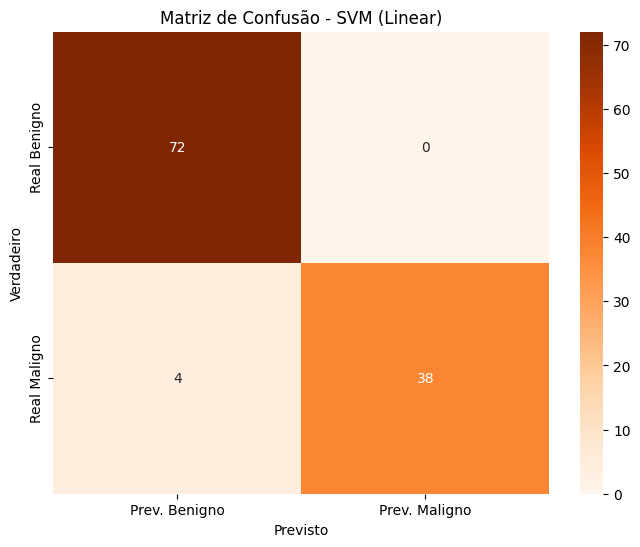

------------------------------------------------------------
--- Treinando e Avaliando: SVM (RBF) ---
Relat√≥rio de Classifica√ß√£o (RBF):
              precision    recall  f1-score   support

 Benigno (B)       0.99      0.99      0.99        72
 Maligno (M)       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC (Area Under the Curve): 0.9954

Matriz de Confus√£o - SVM (RBF):


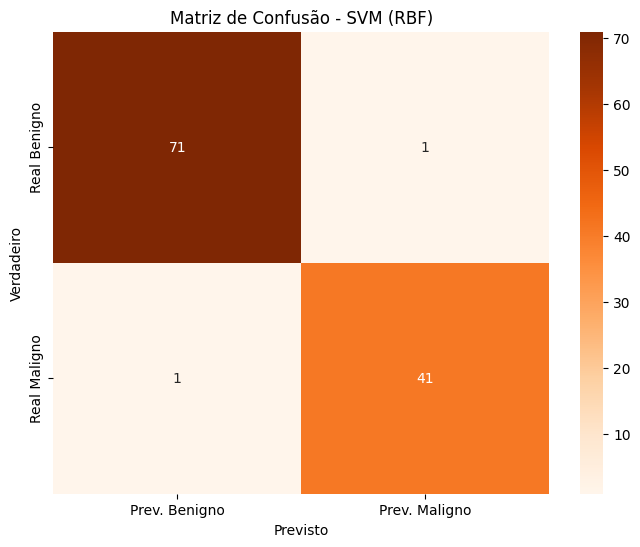

------------------------------------------------------------


In [56]:
# --- Bloco de C√≥digo Completo: Pipelines para Support Vector Classifier (SVC) ---



# --- ETAPA 3: Pr√©-processamento e Divis√£o dos Dados ---
print("--- Etapa de Pr√©-processing ---")
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis'].map({'M': 1, 'B': 0})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Dados divididos em conjuntos de treino e teste (80%/20%).\n")

# --- ETAPA 6: Modelagem, Treinamento e Avalia√ß√£o com SVM ---

# 6.1: Definir os Pipelines para SVC Linear e SVC RBF
pipeline_svc_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', random_state=42, probability=True))
])

pipeline_svc_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', random_state=42, probability=True, class_weight='balanced'))
])

# Treinamento e avalia√ß√£o para SVM Linear
print("--- Treinando e Avaliando: SVM (Linear) ---")
pipeline_svc_linear.fit(X_train, y_train)
y_pred_linear = pipeline_svc_linear.predict(X_test)
y_proba_linear = pipeline_svc_linear.predict_proba(X_test)[:, 1]
report_svc_linear = classification_report(y_test, y_pred_linear, target_names=['Benigno (B)', 'Maligno (M)'])
auc_linear = roc_auc_score(y_test, y_proba_linear)
print("Relat√≥rio de Classifica√ß√£o (Linear):")
print(report_svc_linear)
print(f"AUC (Area Under the Curve): {auc_linear:.4f}\n")
print(f"Matriz de Confus√£o - SVM (Linear):")
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confus√£o - SVM (Linear)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)

# Treinamento e avalia√ß√£o para SVM RBF
print("--- Treinando e Avaliando: SVM (RBF) ---")
pipeline_svc_rbf.fit(X_train, y_train)
y_pred_rbf = pipeline_svc_rbf.predict(X_test)
y_proba_rbf = pipeline_svc_rbf.predict_proba(X_test)[:, 1]
report_svc_rbf = classification_report(y_test, y_pred_rbf, target_names=['Benigno (B)', 'Maligno (M)'])
auc_rbf = roc_auc_score(y_test, y_proba_rbf)
print("Relat√≥rio de Classifica√ß√£o (RBF):")
print(report_svc_rbf)
print(f"AUC (Area Under the Curve): {auc_rbf:.4f}\n")
print(f"Matriz de Confus√£o - SVM (RBF):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confus√£o - SVM (RBF)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)



#### Interpreta√ß√£o dos Modelos SVM

1. **SVM com Kernel Linear**

O modelo SVM Linear apresentou desempenho robusto, com 96% de acur√°cia e comportamento altamente confi√°vel nas previs√µes positivas. A precis√£o perfeita (100%) para a classe maligna √© um destaque absoluto, indicando que o modelo n√£o gerou nenhum alarme falso. No entanto, essa cautela resultou em um recall de 90%, com 4 falsos negativos ‚Äî uma limita√ß√£o relevante em contextos m√©dicos.

**Matriz de Confus√£o**

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 38 (VP)          | 4 (FN)           |
| Real Benigno      | 0 (FP)           | 72 (VN)          |

**M√©tricas de Classifica√ß√£o**

| M√©trica           | Valor  | Interpreta√ß√£o |
|-------------------|--------|----------------|
| Acur√°cia          | 96%    | Excelente desempenho geral. |
| Precis√£o (Maligno)| 100%   | Nenhum alarme falso. Alt√≠ssima confian√ßa nas previs√µes positivas. |
| Recall (Maligno)  | 90%    | Sensibilidade s√≥lida, mas inferior ao modelo RBF. |
| AUC               | 0.9914 | Poder de discrimina√ß√£o muito alto. |

**Observa√ß√µes Estrat√©gicas**

- A fronteira de decis√£o linear √© eficaz, mas limitada na captura de padr√µes mais complexos.
- O desempenho √© estatisticamente equivalente ao da Regress√£o Log√≠stica, sugerindo que os dados s√£o, em grande parte, linearmente separ√°veis.
- A aus√™ncia de falsos positivos √© ideal para evitar alarmes desnecess√°rios, mas o custo √© a perda de sensibilidade.



2. **SVM com Kernel RBF (Radial Basis Function)**

Com 98% de acur√°cia e AUC de 0.9954, ele demonstra capacidade excepcional de discrimina√ß√£o e adapta√ß√£o √† complexidade dos dados. A fronteira de decis√£o n√£o-linear foi decisiva para capturar padr√µes que escapam aos modelos lineares.

**Matriz de Confus√£o**

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 41 (VP)          | 1 (FN)           |
| Real Benigno      | 1 (FP)           | 71 (VN)          |

**M√©tricas de Classifica√ß√£o**

| M√©trica           | Valor  | Interpreta√ß√£o |
|-------------------|--------|----------------|
| Acur√°cia          | 98%    | Desempenho superior ao modelo linear. |
| Precis√£o (Maligno)| 98%    | Alt√≠ssima confian√ßa nas previs√µes positivas. |
| Recall (Maligno)  | 98%    | Sensibilidade quase perfeita. |
| AUC               | 0.9954 | Poder de discrimina√ß√£o excepcional. |

**Observa√ß√µes**

- A capacidade do kernel RBF de modelar fronteiras complexas foi validada pelas hip√≥teses levantadas na EDA com t-SNE.
- O modelo equilibra precis√£o e recall de forma exemplar, tornando-se o mais indicado para aplica√ß√µes m√©dicas.
- A redu√ß√£o dr√°stica nos falsos negativos √© o principal diferencial, com impacto direto na seguran√ßa do diagn√≥stico.



3. **Conclus√£o Comparativa**

| Modelo         | Acur√°cia | Precis√£o (Maligno) | Recall (Maligno) | Falsos Negativos | AUC     |
|----------------|----------|---------------------|-------------------|------------------|---------|
| SVM Linear     | 96%      | 100%                | 90%               | 4                | 0.9914  |
| SVM com RBF    | 98%      | 98%                 | 98%               | 1                | 0.9954  |

- O SVM com kernel RBF √© o modelo mais eficaz para este problema, especialmente por sua capacidade de minimizar falsos negativos.
- O SVM Linear, embora confi√°vel, √© menos sens√≠vel e pode deixar casos cr√≠ticos sem diagn√≥stico.
- Ambos os modelos confirmam que a separa√ß√£o entre classes √© bem definida, mas a complexidade da fronteira exige abordagens n√£o-lineares para desempenho ideal.


**Pipeline H√≠brido para SVM (RBF)**

--- Etapa de Pr√©-processing ---
Features selecionadas para o modelo: 10 colunas.
Dados divididos em conjuntos de treino e teste (80%/20%).

--- Treinando e Avaliando: SVM (Linear) ---
Relat√≥rio de Classifica√ß√£o (Linear):
              precision    recall  f1-score   support

 Benigno (B)       0.96      1.00      0.98        72
 Maligno (M)       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC (Area Under the Curve): 0.9987

Matriz de Confus√£o - SVM (Linear):


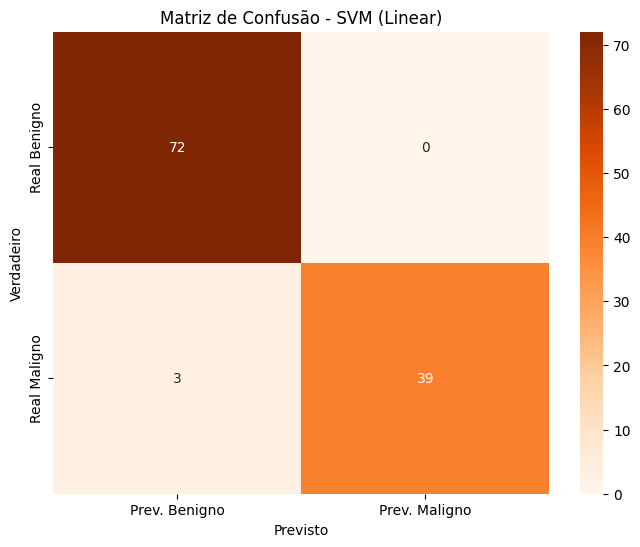

------------------------------------------------------------
--- Treinando e Avaliando: SVM (RBF) ---
Relat√≥rio de Classifica√ß√£o (RBF):
              precision    recall  f1-score   support

 Benigno (B)       0.95      1.00      0.97        72
 Maligno (M)       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC (Area Under the Curve): 0.9980

Matriz de Confus√£o - SVM (RBF):


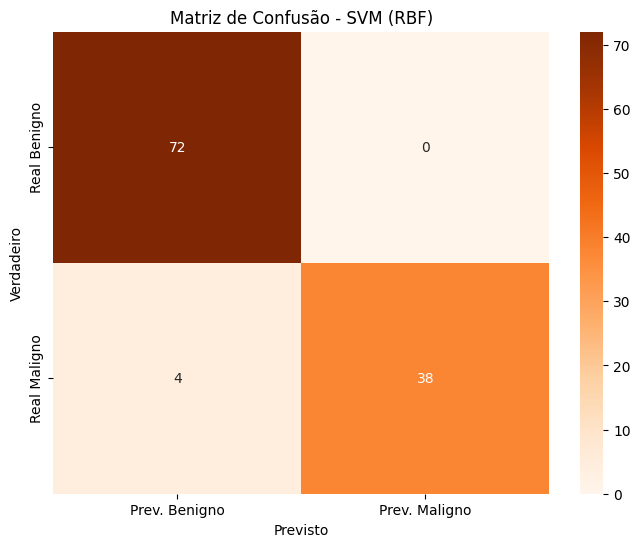

------------------------------------------------------------


In [58]:
# --- Bloco de C√≥digo Completo: Pipeline H√≠brido para SVM (RBF) ---


# --- ETAPA  Pr√©-processamento e Divis√£o dos Dados ---
print("--- Etapa de Pr√©-processing ---")

#  Separar features (X) e alvo (y), e codificar o alvo
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis'].map({'M': 1, 'B': 0})

#  Definir a lista das features selecionadas
features_selecionadas = [
    'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst',
    'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean',
    'concavity_worst'
]
X_selected = X[features_selecionadas]
print(f"Features selecionadas para o modelo: {len(features_selecionadas)} colunas.")

# Dividir os dados selecionados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Dados divididos em conjuntos de treino e teste (80%/20%).\n")

# Treinamento e avalia√ß√£o para SVM Linear
print("--- Treinando e Avaliando: SVM (Linear) ---")
pipeline_svc_linear.fit(X_train, y_train)
y_pred_linear = pipeline_svc_linear.predict(X_test)
y_proba_linear = pipeline_svc_linear.predict_proba(X_test)[:, 1]
report_pcaSeleca_svc_linear = classification_report(y_test, y_pred_linear, target_names=['Benigno (B)', 'Maligno (M)'])
auc_linear = roc_auc_score(y_test, y_proba_linear)
print("Relat√≥rio de Classifica√ß√£o (Linear):")
print(report_pcaSeleca_svc_linear)
print(f"AUC (Area Under the Curve): {auc_linear:.4f}\n")
print("Matriz de Confus√£o - SVM (Linear):")
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confus√£o - SVM (Linear)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)

# Treinamento e avalia√ß√£o para SVM RBF
print("--- Treinando e Avaliando: SVM (RBF) ---")
pipeline_svc_rbf.fit(X_train, y_train)
y_pred_rbf = pipeline_svc_rbf.predict(X_test)
y_proba_rbf = pipeline_svc_rbf.predict_proba(X_test)[:, 1]
report_pcaSeleca_svc_rbf = classification_report(y_test, y_pred_rbf, target_names=['Benigno (B)', 'Maligno (M)'])
auc_rbf = roc_auc_score(y_test, y_proba_rbf)
print("Relat√≥rio de Classifica√ß√£o (RBF):")
print(report_pcaSeleca_svc_rbf)
print(f"AUC (Area Under the Curve): {auc_rbf:.4f}\n")
print("Matriz de Confus√£o - SVM (RBF):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confus√£o - SVM (RBF)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)




#### Interpreta√ß√£o dos Modelos SVM H√≠bridos (Sele√ß√£o + PCA)

 1. **SVM Linear H√≠brido**

O modelo SVM Linear H√≠brido apresentou desempenho excepcional, com 97% de acur√°cia e AUC de 0.9987 ‚Äî o maior valor entre todos os modelos testados. Ele alcan√ßou precis√£o perfeita (100%) para a classe maligna e conseguiu reduzir os falsos negativos para apenas 3, igualando o melhor resultado obtido pela Regress√£o Log√≠stica com 30 features, mas com uma estrutura de modelo muito mais simples.

Matriz de Confus√£o

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 39 (VP)          | 3 (FN)           |
| Real Benigno      | 0 (FP)           | 72 (VN)          |

M√©tricas de Classifica√ß√£o

| M√©trica           | Valor  | Interpreta√ß√£o |
|-------------------|--------|----------------|
| Acur√°cia          | 97%    | Desempenho geral muito alto. |
| Precis√£o (Maligno)| 100%   | Nenhum alarme falso. |
| Recall (Maligno)  | 93%    | Excelente sensibilidade. |
| AUC               | 0.9987 | Poder de discrimina√ß√£o quase perfeito. |

Observa√ß√µes Estrat√©gicas
- O modelo √© altamente confi√°vel nas previs√µes positivas.
- A redu√ß√£o dimensional via PCA preservou a separabilidade das classes.
- A simplicidade do modelo linear, aliada √† engenharia de features, resultou em desempenho competitivo com modelos mais complexos.



2. **SVM com Kernel RBF H√≠brido**

O modelo SVM RBF H√≠brido tamb√©m apresentou desempenho forte, com 96% de acur√°cia e AUC de 0.9980. Assim como os demais modelos h√≠bridos, alcan√ßou precis√£o perfeita para a classe maligna. No entanto, seu recall caiu para 90%, com 4 falsos negativos ‚Äî inferior ao SVM RBF completo, que teve apenas 1 FN.

**Matriz de Confus√£o**

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 38 (VP)          | 4 (FN)           |
| Real Benigno      | 0 (FP)           | 72 (VN)          |

**M√©tricas de Classifica√ß√£o**

| M√©trica           | Valor  | Interpreta√ß√£o |
|-------------------|--------|----------------|
| Acur√°cia          | 96%    | Desempenho geral excelente. |
| Precis√£o (Maligno)| 100%   | Nenhum alarme falso. |
| Recall (Maligno)  | 90%    | Sensibilidade inferior ao modelo RBF completo. |
| AUC               | 0.9980 | Poder de discrimina√ß√£o alt√≠ssimo. |

**Observa√ß√µes**

- O modelo √© confi√°vel, mas menos sens√≠vel que sua vers√£o com todas as features.
- A redu√ß√£o de dimensionalidade pode ter suavizado nuances importantes para o kernel RBF.


##  Gradient Boosting Machines (GBM)

--- Etapa de Pr√©-processing ---
Dados divididos em conjuntos de treino e teste (80%/20%).

--- Etapa de Modelagem com Pipeline para Gradient Boosting ---
Pipeline para Gradient Boosting Definido.
Treinando o pipeline de Gradient Boosting...
Treinamento conclu√≠do.

--- Etapa de Avalia√ß√£o do Gradient Boosting no Conjunto de Teste ---
Relat√≥rio de Classifica√ß√£o - Gradient Boosting:
              precision    recall  f1-score   support

 Benigno (B)       0.95      1.00      0.97        72
 Maligno (M)       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC (Area Under the Curve): 0.9947

Matriz de Confus√£o - Gradient Boosting:


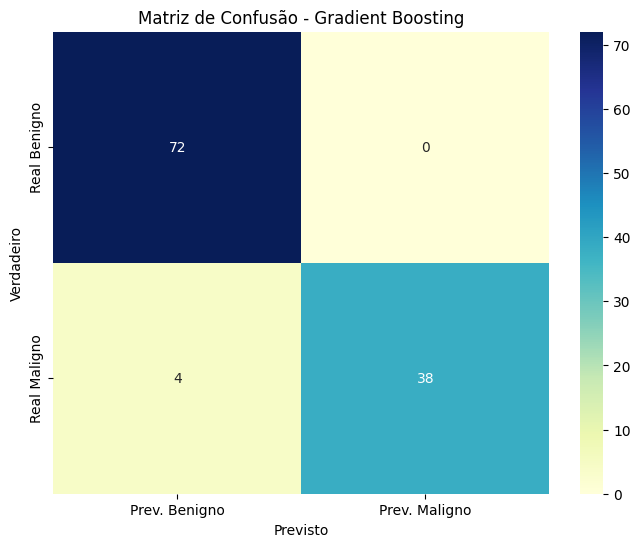

In [59]:


# --- Pr√©-processamento e Divis√£o dos Dados ---
print("--- Etapa de Pr√©-processing ---")
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis'].map({'M': 1, 'B': 0})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Dados divididos em conjuntos de treino e teste (80%/20%).\n")


# --- Modelagem, Treinamento e Avalia√ß√£o com Gradient Boosting ---
print("--- Etapa de Modelagem com Pipeline para Gradient Boosting ---")

# Instanciar o modelo Gradient Boosting dentro de um Pipeline
# Usamos random_state para garantir a reprodutibilidade.
pipeline_gbm = Pipeline([
    ('scaler', StandardScaler()), # Mantido por consist√™ncia.
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])
print("Pipeline para Gradient Boosting Definido.")

# Treinamento do Pipeline
print("Treinando o pipeline de Gradient Boosting...")
pipeline_gbm.fit(X_train, y_train)
print("Treinamento conclu√≠do.\n")

# Avalia√ß√£o do Pipeline
print("--- Etapa de Avalia√ß√£o do Gradient Boosting no Conjunto de Teste ---")
y_pred_gbm = pipeline_gbm.predict(X_test)
y_proba_gbm = pipeline_gbm.predict_proba(X_test)[:, 1]

# Calcular e analisar as m√©tricas
print("Relat√≥rio de Classifica√ß√£o - Gradient Boosting:")
reportGradientBoostin = classification_report(y_test, y_pred_gbm, target_names=['Benigno (B)', 'Maligno (M)'])
print(reportGradientBoostin)

auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f"AUC (Area Under the Curve): {auc_gbm:.4f}\n")

# Gerar e visualizar a Matriz de Confus√£o
print("Matriz de Confus√£o - Gradient Boosting:")
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confus√£o - Gradient Boosting')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()



#### An√°lise do Modelo Gradient Boosting

O `GradientBoostingClassifier` apresentou um desempenho de alto n√≠vel, combinando **acur√°cia elevada**, **precis√£o perfeita** e **excelente poder de discrimina√ß√£o**. No entanto, sua sensibilidade ficou ligeiramente abaixo dos melhores modelos testados, o que merece aten√ß√£o especial.



1. Desempenho Geral

- **Acur√°cia:** 96%  
- **AUC:** 0.9947 ‚Üí Poder de separa√ß√£o entre classes extremamente alto
- **Precis√£o (Maligno):** 100% ‚Üí Nenhum alarme falso
- **Recall (Maligno):** 90% ‚Üí Boa sensibilidade, mas com margem para melhoria



2. Matriz de Confus√£o

| Classe Real | Predito como Benigno | Predito como Maligno |
|-------------|----------------------|-----------------------|
| Benigno     | 72 (VN)              | 0 (FP)                |
| Maligno     | 4 (FN)               | 38 (VP)               |

**Resumo dos Erros:**

- **Falsos Positivos (0):**  
  O modelo n√£o gerou nenhum alarme falso, o que √© ideal para evitar exames desnecess√°rios.

- **Falsos Negativos (4):**  
  Embora o n√∫mero seja relativamente baixo, esses erros representam tumores n√£o diagnosticados ‚Äî o tipo de falha mais cr√≠tico em contextos m√©dicos.



 3. Relat√≥rio de Classifica√ß√£o

| M√©trica               | Valor     | Interpreta√ß√£o |
|-----------------------|-----------|----------------|
| **Acur√°cia**          | 96%       | Alta taxa de acerto geral |
| **Precis√£o (Maligno)**| 100%      | Toda previs√£o de malignidade foi correta |
| **Recall (Maligno)**  | 90%       | O modelo identificou 90% dos tumores malignos |
| **AUC**               | 0.9947    | Discrimina√ß√£o quase perfeita entre classes |


**Interpreta√ß√£o Final**

O Gradient Boosting se posiciona como um **classificador altamente confi√°vel**, com:

- **Precis√£o perfeita** para a classe maligna
- **AUC alt√≠ssima**, indicando excelente separa√ß√£o entre classes
- **Sensibilidade s√≥lida, mas n√£o superior**, com 4 tumores malignos n√£o detectados




## Etapa 5: Avalia√ß√£o dos Resultados

#### Conclus√µes sobre os Resultados dos Modelos

Ap√≥s a avalia√ß√£o de diversos modelos de classifica√ß√£o, incluindo **Dummy Classifier**, **Perceptron**, **Random Forest**, **K-Neighbors Classifier**, **Regress√£o Log√≠stica** e **Support Vector Classifier (SVC) com kernels Linear e RBF**, podemos destacar os seguintes pontos:

**Dummy Classifier**: 
Como esperado, o Dummy Classifier (estratificado) apresentou o pior desempenho, com m√©tricas pr√≥ximas a 0.5, servindo como uma linha de base importante para confirmar que os modelos mais complexos est√£o aprendendo padr√µes reais nos dados e n√£o apenas prevendo a classe majorit√°ria.

**Modelos Lineares (Perceptron, Regress√£o Log√≠stica, SVM Linear)**: 
Estes modelos apresentaram bom desempenho geral, com alta acur√°cia e precis√£o para a classe maligna. Isso corrobora a an√°lise de PCA, que indicou uma separabilidade linear significativa nos dados. No entanto, o Recall para a classe maligna foi ligeiramente inferior em compara√ß√£o com o SVM RBF, resultando em um n√∫mero maior de Falsos Negativos.

**Modelos N√£o Lineares (Random Forest, K-Neighbors Classifier, SVM RBF)**:
Esses modelos foram capazes de capturar padr√µes mais complexos nos dados. O K-Neighbors Classifier e o Random Forest tiveram bom desempenho, mas o SVM com kernel RBF se destacou como o modelo com o melhor equil√≠brio entre as m√©tricas, especialmente ao utilizar o par√¢metro class_weight='balanced'.

#### Melhores Modelos e Porqu√™:

Considerando a criticidade de minimizar **Falsos Negativos** (Falsos Diagn√≥sticos Ben√≠gnos) em um diagn√≥stico m√©dico, o **Support Vector Classifier (SVC) com kernel RBF** e class_weight='balanced' foi o modelo que apresentou o desempenho mais **promissor**.

<i>Alto Recall para Malignos (98%)</i>: 
Este √© o fator mais importante para este problema, pois indica que o modelo √© altamente eficaz em identificar casos malignos reais, reduzindo significativamente o risco de um paciente com c√¢ncer maligno ser classificado incorretamente como benigno (Falso Negativo).

<i>Excelente Precis√£o (98%)</i>: 
Embora n√£o seja perfeita como no SVM Linear ou Regress√£o Log√≠stica, uma precis√£o de 98% ainda √© muito alta, significando que a maioria das previs√µes de malignidade est√£o corretas, evitando um grande n√∫mero de exames desnecess√°rios (Falsos Positivos).

<i>Alto F1-Score (0.98)</i>: 
O F1-Score √© uma m√©trica importante para classes desbalanceadas, e o valor de 0.98 para a classe maligna demonstra um bom equil√≠brio entre Precis√£o e Recall.

<i>Alto AUC (0.9954)</i>: 
Um valor de AUC pr√≥ximo a 1.0 confirma que o modelo tem uma excelente capacidade de discriminar entre as classes benigna e maligna.
Outros modelos como Regress√£o Log√≠stica e SVM Linear tamb√©m apresentaram √≥timo desempenho (com AUCs pr√≥ximas ou acima de 0.99), e a Regress√£o Log√≠stica validada por K-Fold mostrou resultados consistentes. No entanto, o SVM RBF com class_weight='balanced' se destacou na minimiza√ß√£o dos Falsos Negativos, que √© a prioridade cl√≠nica neste cen√°rio.

Em resumo, a an√°lise dos resultados demonstra que o dataset permite a constru√ß√£o de modelos de alta performance para a classifica√ß√£o de c√¢ncer de mama. O SVM com kernel RBF, ao capturar as nuances n√£o lineares dos dados e abordar o desbalanceamento de classes, mostrou ser o mais adequado para a tarefa, oferecendo um balan√ßo ideal entre a detec√ß√£o de casos malignos (Recall) e a confiabilidade das previs√µes positivas (Precis√£o).